In [1]:
from transformers import XLNetTokenizer, XLNetModel
import torch

In [2]:

from transformers import BertTokenizer, BertModel, BertForMaskedLM
from scipy.spatial.distance import cosine
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import spacy
import numpy as np
import matplotlib

In [343]:
def map_on_3d(data_2d,words,color_mapping:None,exceptional_words=[],use_word_colors=False,fig_size=[19,11],title=""):
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(fig_size[0], fig_size[1])

    ax = plt.axes(projection ="3d")
    #scatter result words
    ax.scatter3D(data_2d[:, 0], data_2d[:, 1], data_2d[:, 2])
    plt.title(title)        
    #put an annotation on x,y cordinates for words
    for i, word in enumerate(words):
        if color_mapping is not None:
            ax.text(data_2d[i, 0], data_2d[i, 1], data_2d[i, 2],word,color=color_mapping[i] )
        elif word in exceptional_words:
            ax.text(data_2d[i, 0], data_2d[i, 1], data_2d[i, 2],word,color='#0000ff' )
        elif use_word_colors:
            ax.text(data_2d[i, 0], data_2d[i, 1], data_2d[i, 2],word,color=get_color(word))
        elif "eat" in word:
            ax.text(data_2d[i, 0], data_2d[i, 1], data_2d[i, 2],word,color='#0000ff')
        elif "drink" in word:
            ax.text(data_2d[i, 0], data_2d[i, 1], data_2d[i, 2],word,color='#00ff00')
        elif "read" in word:
            ax.text(data_2d[i, 0], data_2d[i, 1], data_2d[i, 2],word,color='#ff0000')     
        else:
            ax.text(data_2d[i, 0], data_2d[i, 1], data_2d[i, 2],word,color='#ff00dd')
    plt.show()

def get_color_mapping(Ys,color_by="verb"):
  
  mapped_colors = []
  if color_by == "verb":    
    colors =["#ff0000","#00dd00","#0000dd"] 
    verbs = ["eat","drink"," read"] #bread has "read" process carefully
    for y in Ys:
      indexes = [i for i,verb in enumerate(verbs) if y.find(verb) > -1]
      mapped_colors.append(colors[indexes[0]] )
  elif color_by == "object":    
    colors =["#ff0000","#aaaa00","#00ff00","#000220","#0000ff","#00aaaa"] 
    objects = ["apple","bread","water","beer","book","newspaper"]
    for y in Ys:
      indexes = [i for i,object in enumerate(objects) if y.find(object) > -1]
      mapped_colors.append(colors[indexes[0]] )    
  elif color_by == "index10":    
    colors =["#ff0000","#00ff00","#0000ff"]     
    for index,y in enumerate(Ys):
      index_color = index // 10 
      mapped_colors.append(colors[index_color] )            
  else:
    colors =["#ff0000","#aaaa00","#00ff00","#000220","#0000ff","#00aaaa"] 
    for index,y in enumerate(Ys):      
      mapped_colors.append(colors[ index % len(colors)] )    
    
  return mapped_colors  

def map_on_2d(data_2d,words,color_mapping:None,exceptional_words=[],use_word_colors=False,fig_size=[16,11],title=""):
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(fig_size[0], fig_size[1])

    #scatter result words
    plt.scatter(data_2d[:, 0], data_2d[:, 1])        
    plt.title(title)
    #put an annotation on x,y cordinates for words
    for i, word in enumerate(words):
        if color_mapping is not None:
            plt.annotate(word, xy=(data_2d[i, 0], data_2d[i, 1]),color=color_mapping[i] )
        elif word in exceptional_words:
            plt.annotate(word, xy=(data_2d[i, 0], data_2d[i, 1]),color='#0000ff' )
        elif use_word_colors:
            plt.annotate(word, xy=(data_2d[i, 0], data_2d[i, 1]),color=get_color(word))
        elif "eat" in word:
            plt.annotate(word, xy=(data_2d[i, 0], data_2d[i, 1]),color='#0000ff')
        elif "drink" in word:
            plt.annotate(word, xy=(data_2d[i, 0], data_2d[i, 1]),color='#00ff00')
        elif "read" in word:
            plt.annotate(word, xy=(data_2d[i, 0], data_2d[i, 1]),color='#ff0000')     
        else:
            plt.annotate(word, xy=(data_2d[i, 0], data_2d[i, 1]),color='#ff00dd')
    plt.show()   

def dump_on_surface(Xs,Ys,fitting="tsne",dump_3d=True,dump_2d=True,color_by="verb",title=""):    
    color_mapping = get_color_mapping(Ys,color_by)
    #print(color_mapping)
    X_transformed = None                         
    if dump_3d:    
        X_transformed = None
        if fitting == "tsne" :
            X_transformed = TSNE(n_components=3).fit_transform(np.array(Xs))
        elif fitting == "pcatsne" :    
            X_transformed = PCA(n_components=20).fit_transform(np.array(Xs))   
            X_transformed = TSNE(n_components=3).fit_transform(np.array(X_transformed))
        else:
            X_transformed = PCA(n_components=3).fit_transform(np.array(Xs))          
        map_on_3d(np.array(X_transformed),Ys,color_mapping=color_mapping,use_word_colors=False,fig_size=[10,10],title=title)
        
    if dump_2d:    
        X_transformed = None
        if fitting == "tsne" :
            X_transformed = TSNE(n_components=2).fit_transform(np.array(Xs))
        elif fitting == "pcatsne" :    
            X_transformed = PCA(n_components=20).fit_transform(np.array(Xs))   
            X_transformed = TSNE(n_components=2).fit_transform(np.array(X_transformed))    
        else:
            X_transformed = PCA(n_components=2).fit_transform(np.array(Xs))                    
        map_on_2d(np.array(X_transformed),Ys,color_mapping=color_mapping,use_word_colors=False,fig_size=[10,10],title=title)
    return X_transformed    

In [4]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased') 
print(tokenizer)
model = XLNetModel.from_pretrained('xlnet-base-cased')

PreTrainedTokenizer(name_or_path='xlnet-base-cased', vocab_size=32000, model_max_len=1000000000000000019884624838656, is_fast=False, padding_side='left', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '<sep>', 'pad_token': '<pad>', 'cls_token': '<cls>', 'mask_token': '<mask>', 'additional_special_tokens': ['<eop>', '<eod>']})


In [5]:
#help(tokenizer)

#    BERT: ['Who', 'is', 'S', '##hak', '##a', 'Khan', '?']
#    RoBERTa: ['Who', '_is', '_Sh', 'aka', '_Khan', '?']
#    XLNet: ['▁Who', '▁is', '▁Shak', 'a', '▁Khan', '?']

#I invite you to use Sentence_Transformers. 
#The project fine-tunes BERT / RoBERTa / DistilBERT / ALBERT / XLNet with a siamese 
#or triplet network structure to produce semantically meaningful sentence embeddings.

In [6]:
def get_output(tokenizer_,model_,sentence):
  inputs = tokenizer_(sentence, return_tensors="pt",add_special_tokens=True)
  outputs = model_(**inputs,mems=None,return_dict=True)
  return outputs  

def get_sentence_output(tokenizer_,model_,sentence):
  outputs = get_output(tokenizer_,model_,sentence)  
  return outputs[0][:, -1].squeeze()

class EmbeddingPair:
  def __init__(self,word,vector):
    self.word = word
    self.vector = vector
    
#return token -> token_embedding as pairs.    
def get_embeddings_as_pair(tokenizer_,model_,sentence,embeddings,id_to_token):
  embeddings_pair = []
  #print("embeddings.squeeze().shape[0]",embeddings.squeeze().shape[0])
  #print("embeddings.squeeze().shape[0]",embeddings.shape)  
  for i in range(embeddings.squeeze().shape[0]):
    #print( id_to_token[i] )    
    #print(tokenizer.convert_tokens_to_string(id_to_token[i]))
    #print( last_hidden_states.squeeze()[i].shape)
    word = tokenizer.convert_tokens_to_string(id_to_token[i])
    vector = embeddings.squeeze()[i]
    embed = EmbeddingPair(word , vector)
    embeddings_pair.append( embed )

  return embeddings_pair


#given a sentence only return the embeddings of specified word
#just my utility method for easy visualization
#['▁', 'i', '▁eat', '▁apple', '<sep>', '<cls>']
def get_word_embeddings(tokenizer_,model_,sentence,keyword):
  outputs = get_output(tokenizer_,model_,sentence)
  inputs = tokenizer(sentence, return_tensors="pt",add_special_tokens=True) 
  id_to_token = tokenizer.convert_ids_to_tokens( inputs['input_ids'].squeeze() )
  tokens_to_string = tokenizer.convert_tokens_to_string(id_to_token)
  last_hidden_states = outputs["last_hidden_state"]
  
  embeddings_as_pairs = get_embeddings_as_pair(tokenizer_,model_,sentence,last_hidden_states,id_to_token)
  word_embeddings = []
  for pair in embeddings_as_pairs:
    if pair.word.endswith( keyword ) :
      word_embeddings.append( pair )
  return word_embeddings  

def get_similarity(vector1,vector2):
  return 1 - cosine(vector1, vector2)     

In [7]:
pairs = get_word_embeddings(tokenizer,model,"i eat apple","eat")
pairs[0].word
#pairs[0].vector

'eat'

In [8]:
sentence_embedding = get_sentence_output(tokenizer,model,"i eat apple")
assert sentence_embedding.shape[0] == 768

In [9]:
#XLNet uses a SentencePiece tokenizer which splits the words into subword units. 
inputs = tokenizer("i eat apple", return_tensors="pt",add_special_tokens=True)
print("inputs",inputs)
outputs = model(**inputs,mems=None,return_dict=True)
print( outputs.keys())
print("last",outputs["last_hidden_state"].shape)
print("cls",outputs[0][:, -1].shape)
print("inputs[input_ids] ",inputs['input_ids'])
id_to_token = tokenizer.convert_ids_to_tokens( inputs['input_ids'].squeeze() )
print("id_to_token",id_to_token)
tokens_to_string = tokenizer.convert_tokens_to_string(id_to_token)
print("tokens_to_string",tokens_to_string)
last_hidden_states = outputs["last_hidden_state"]
for i in range(last_hidden_states.squeeze().shape[0]):
    print(tokenizer.convert_tokens_to_string(id_to_token[i]))
    print( last_hidden_states.squeeze()[i].shape)

print("mems",len ( outputs["mems"]) )
for i in range( len ( outputs["mems"]) ):
    print( outputs["mems"][i].shape )

inputs {'input_ids': tensor([[   17,   150,  2514, 10782,     4,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}
odict_keys(['last_hidden_state', 'mems'])
last torch.Size([1, 6, 768])
cls torch.Size([1, 768])
inputs[input_ids]  tensor([[   17,   150,  2514, 10782,     4,     3]])
id_to_token ['▁', 'i', '▁eat', '▁apple', '<sep>', '<cls>']
tokens_to_string i eat apple<sep><cls>

torch.Size([768])
i
torch.Size([768])
eat
torch.Size([768])
apple
torch.Size([768])
<sep>
torch.Size([768])
<cls>
torch.Size([768])
mems 12
torch.Size([6, 1, 768])
torch.Size([6, 1, 768])
torch.Size([6, 1, 768])
torch.Size([6, 1, 768])
torch.Size([6, 1, 768])
torch.Size([6, 1, 768])
torch.Size([6, 1, 768])
torch.Size([6, 1, 768])
torch.Size([6, 1, 768])
torch.Size([6, 1, 768])
torch.Size([6, 1, 768])
torch.Size([6, 1, 768])


In [10]:
outputs = get_output(tokenizer,model,"I eat apple")
outputs.keys()

odict_keys(['last_hidden_state', 'mems'])

In [11]:
#https://huggingface.co/transformers/quickstart.html#using-the-past
#past and mems    
#for caching

In [12]:
print( type(outputs) )

<class 'transformers.models.xlnet.modeling_xlnet.XLNetModelOutput'>


In [13]:
outputs["last_hidden_state"].shape

torch.Size([1, 5, 768])

In [14]:
outputs.keys()

odict_keys(['last_hidden_state', 'mems'])

In [15]:
sentences = ['i want to eat bread',
 'i want to eat apple',
 'i want to drink water',
 'i want to drink beer', 
 'i want to read book', 
 'i want to read newspaper',
 'i can eat bread', 
 'i can eat apple', 
 'i can drink water',
 'i can drink beer', 
 'i can read book', 
 'i can read newspaper',
 'we want to eat bread',
 'we want to eat apple',
 'we want to drink water',
 'we want to drink beer',
 'we want to read book', 
 'we want to read newspaper',
 'we can eat bread', 
 'we can eat apple', 
 'we can drink water',
 'we can drink beer', 
 'we can read book', 
 'we can read newspaper',
 'i eat bread', 
 'i eat apple', 
 'i drink water', 
 'i drink beer', 
 'i read book', 
 'i read newspaper',
 'we eat bread', 
 'we eat apple', 
 'we drink water',
 'we drink beer',
 'we read book', 
 'we read newspaper',
 ]
sentences[0]

'i want to eat bread'

In [16]:
import numpy as np

In [17]:
tokenizer_nottrained  = XLNetTokenizer.from_pretrained('xlnet-base-cased') 
model_nottrained = XLNetModel.from_pretrained('xlnet-base-cased')


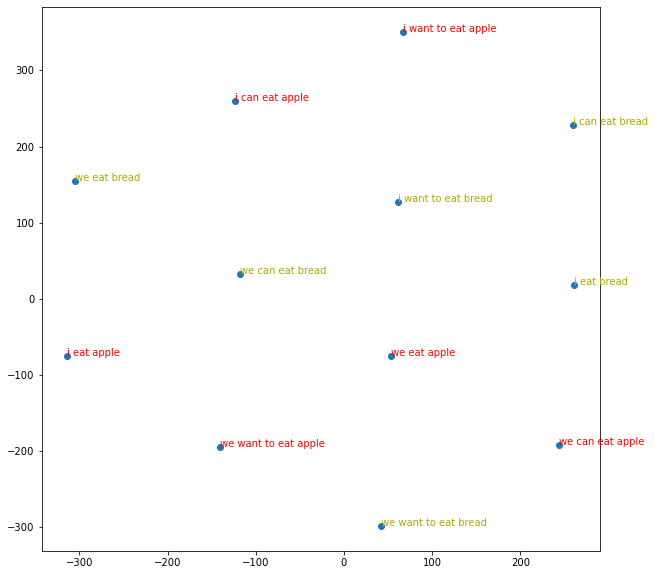

In [18]:
#Lets take sentences with verb eat and ONLY get embedding of verb EAT
#Below are embedding of single verb eat with their sentence
#see how embeddings for them are generated
#results seems nice, we have 3 patterns can,want,verb and seems they are scattered over space
#get_sentence_output(tokenizer,model,"i eat apple")
eat_sentences = [ s for s in sentences if s.find("eat") > 0 ]
word_embeddings = [ get_word_embeddings(tokenizer_nottrained,model_nottrained,s,"eat")[0].vector.detach().numpy() for s in eat_sentences ]
dump_on_surface(word_embeddings,eat_sentences,dump_3d=False,fitting="tsne",color_by="object")

In [19]:

X_transformed = TSNE(n_components=2).fit_transform(np.array(word_embeddings))
for i in range( len(word_embeddings) ):
    print( np.sum(word_embeddings[i]) )
    
print( word_embeddings[0][0:10]    )
print( word_embeddings[1][0:10]    )

137.0961
126.42427
130.82196
107.18734
133.41052
140.18079
142.5705
130.76971
106.97086
88.19345
125.00845
118.19361
[ 1.1630828  -1.4530702  -3.8374221   1.1573768  -0.93656504 -0.56313324
 -0.00533117 -2.569869   -1.4772038   1.2484257 ]
[ 2.1852043  -3.7487805  -4.00277    -0.90101093 -1.3536294  -1.7350131
 -0.82706183 -1.8007749  -1.2745326   0.3565622 ]


In [20]:


#Now I want to see relation of these "eat" vectors,
#these are all eat vectors but having different context
#I will take cosine of every vector with every other,
#so diagonals must be 1(same vectors) and others must show
#the relation. As I see items most unrelated are as below
#we eat apple -> i can eat bread = 0.71 similarity
comparisions = []
for i in range(len(word_embeddings)):
    comparision_row = []
    for j in range(len(word_embeddings)):
        sim = get_similarity(word_embeddings[i],word_embeddings[j])
        comparision_row.append(sim)
    comparisions.append( comparision_row )   
    

pd.options.display.float_format = '{:,.2f}'.format
cm = sns.light_palette("blue", as_cmap=True)
df_eat = pd.DataFrame(data=comparisions ,index=eat_sentences,columns=eat_sentences)
styled_df_eat = df_eat.style.background_gradient(cmap=cm).set_precision(2)
styled_df_eat



,i want to eat bread,i want to eat apple,i can eat bread,i can eat apple,we want to eat bread,we want to eat apple,we can eat bread,we can eat apple,i eat bread,i eat apple,we eat bread,we eat apple
i want to eat bread,1.00,0.99,0.99,0.98,0.99,0.98,0.98,0.97,0.98,0.96,0.98,0.97
i want to eat apple,0.99,1.00,0.98,0.99,0.98,0.99,0.98,0.98,0.97,0.97,0.97,0.98
i can eat bread,0.99,0.98,1.00,0.99,0.98,0.98,0.99,0.98,0.99,0.97,0.98,0.97
i can eat apple,0.98,0.99,0.99,1.00,0.97,0.98,0.98,0.98,0.98,0.99,0.97,0.98
we want to eat bread,0.99,0.98,0.98,0.97,1.00,0.99,0.99,0.98,0.97,0.96,0.99,0.98
we want to eat apple,0.98,0.99,0.98,0.98,0.99,1.00,0.99,0.99,0.97,0.97,0.98,0.98
we can eat bread,0.98,0.98,0.99,0.98,0.99,0.99,1.00,0.99,0.98,0.96,0.99,0.99
we can eat apple,0.97,0.98,0.98,0.98,0.98,0.99,0.99,1.00,0.97,0.97,0.98,0.99
i eat bread,0.98,0.97,0.99,0.98,0.97,0.97,0.98,0.97,1.00,0.99,0.98,0.97
i eat apple,0.96,0.97,0.97,0.99,0.96,0.97,0.96,0.97,0.99,1.00,0.96,0.97


In [140]:
def reduce_dim_draw(sample_sentences,keywords,tokenizer_,model_,fitting="pca"):
    filtered_sentences = []
    word_embeddings = []
    for sent in sample_sentences:
        for keyword in keywords:
            if sent.find(keyword) > -1 :                
                #filtered_sentences.append( sent )
                v = get_word_embeddings(tokenizer_,model_,sent,keyword)[0].vector.detach().numpy()
                word_embeddings.append( v )
                filtered_sentences.append( sent )
    
    word_embeddings = np.array( word_embeddings )
    #word_embeddings = word_embeddings.reshape(1,word_embeddings.shape[0])
    #print("word_embeddings",word_embeddings.shape )
    #print("word_embeddings",word_embeddings )
    # = [ get_word_embeddings(tokenizer_,model_,s,keyword)[0].vector.detach().numpy() for s in filtered_sentences ]
    x_reduced = dump_on_surface(word_embeddings,filtered_sentences,dump_3d=False,fitting=fitting,color_by="other")
    
    return word_embeddings,filtered_sentences,x_reduced

def draw_inner_cosine(word_embeddings_,sentences_):
    comparisions = []
    for i in range(len(word_embeddings_)):
        comparision_row = []
        for j in range(len(word_embeddings_)):
            sim = get_similarity(word_embeddings_[i],word_embeddings_[j])
            comparision_row.append(sim)
        comparisions.append( comparision_row )       
    pd.options.display.float_format = '{:,.2f}'.format
    cm = sns.light_palette("blue", as_cmap=True)
    df_eat = pd.DataFrame(data=comparisions ,index=sentences_,columns=sentences_)
    styled_df_eat = df_eat.style.background_gradient(cmap=cm).set_precision(2)
    return styled_df_eat    

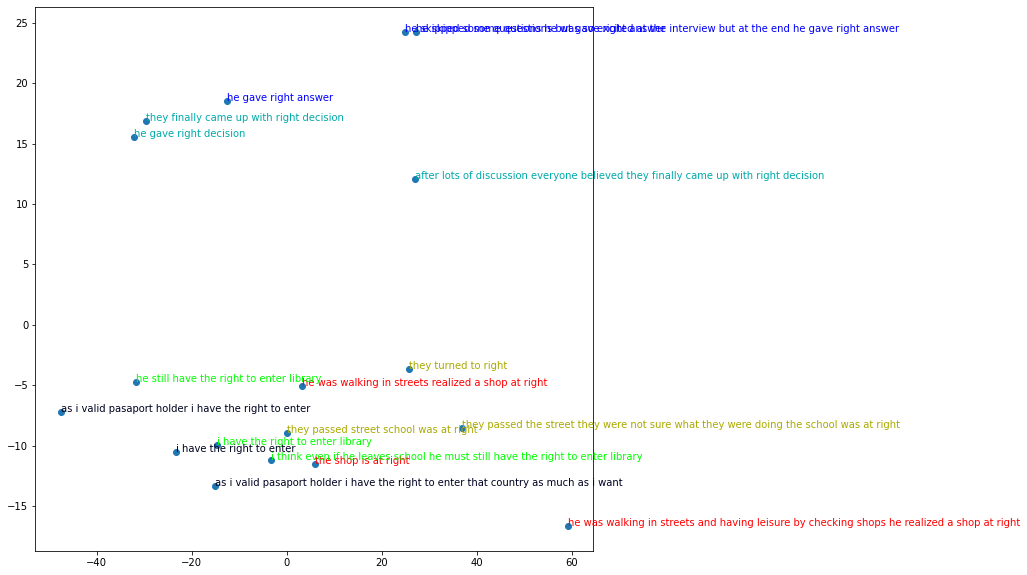

x_reduced [[  5.917538   -11.477219  ]
 [ 25.72844     -3.6219158 ]
 [-14.71671     -9.977753  ]
 [-23.258436   -10.533629  ]
 [-12.638671    18.510399  ]
 [-32.1386      15.503889  ]
 [  3.2803378   -5.0998735 ]
 [  0.09361181  -8.940772  ]
 [-31.740753    -4.757093  ]
 [-47.635628    -7.197378  ]
 [ 27.098671    24.239054  ]
 [-29.60712     16.840925  ]
 [ 59.178493   -16.656168  ]
 [ 36.82626     -8.540359  ]
 [ -3.2849376  -11.204065  ]
 [-15.043609   -13.368411  ]
 [ 24.907715    24.241142  ]
 [ 27.03383     12.039175  ]]


In [144]:
right_sentences = right_sentences_short + right_sentences_medium + right_sentences_long

keyword = ["right"]

word_embeddings,_,x_reduced = reduce_dim_draw( right_sentences,keyword ,tokenizer_nottrained,model_nottrained)

#draw_inner_cosine(word_embeddings,right_sentences)
print("x_reduced",x_reduced)

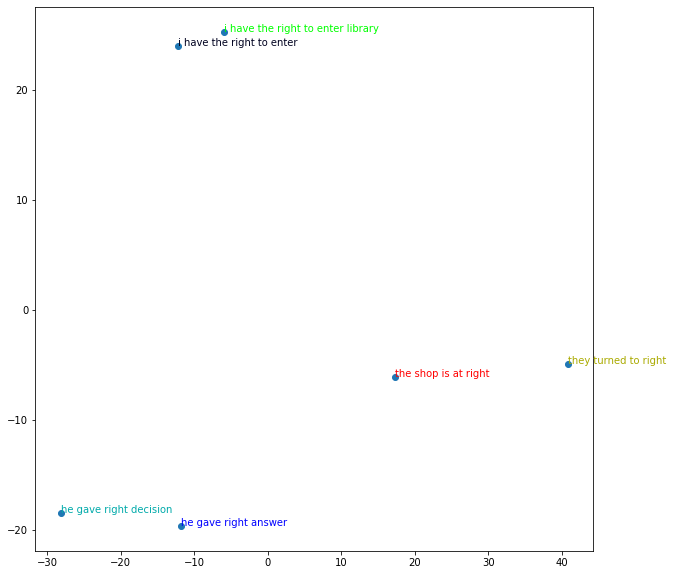

,the shop is at right,they turned to right,i have the right to enter library,i have the right to enter,he gave right answer,he gave right decision
the shop is at right,1.00,0.98,0.97,0.97,0.97,0.98
they turned to right,0.98,1.00,0.97,0.97,0.98,0.98
i have the right to enter library,0.97,0.97,1.00,1.00,0.98,0.98
i have the right to enter,0.97,0.97,1.00,1.00,0.98,0.98
he gave right answer,0.97,0.98,0.98,0.98,1.00,0.99
he gave right decision,0.98,0.98,0.98,0.98,0.99,1.00


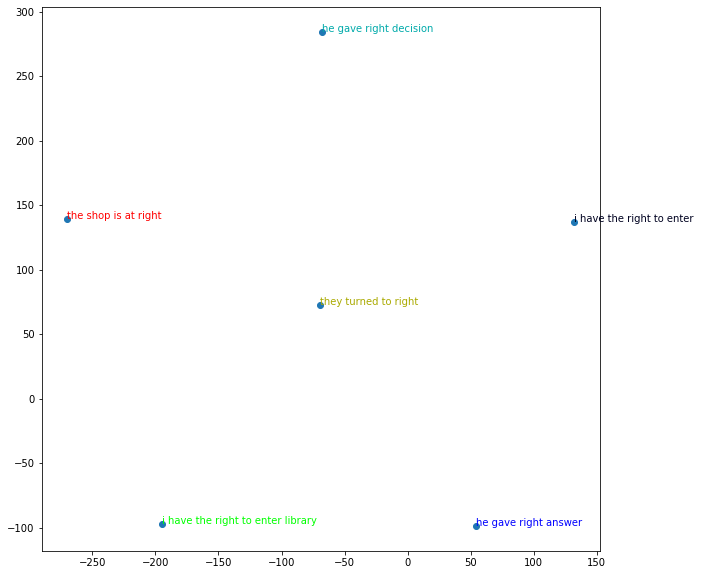

,the shop is at right,they turned to right,i have the right to enter library,i have the right to enter,he gave right answer,he gave right decision
the shop is at right,1.00,0.98,0.97,0.97,0.97,0.98
they turned to right,0.98,1.00,0.97,0.97,0.98,0.98
i have the right to enter library,0.97,0.97,1.00,1.00,0.98,0.98
i have the right to enter,0.97,0.97,1.00,1.00,0.98,0.98
he gave right answer,0.97,0.98,0.98,0.98,1.00,0.99
he gave right decision,0.98,0.98,0.98,0.98,0.99,1.00


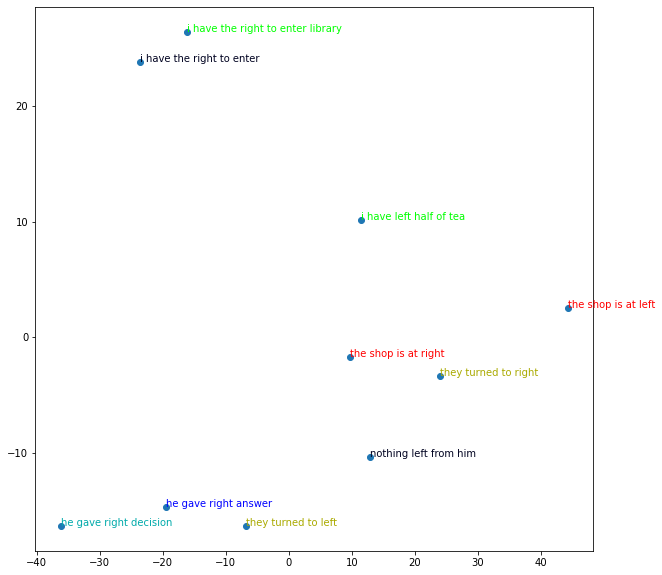

,the shop is at right,they turned to right,i have the right to enter library,i have the right to enter,he gave right answer,he gave right decision,the shop is at left,they turned to left,i have left half of tea,nothing left from him
the shop is at right,1.00,0.98,0.97,0.97,0.97,0.98,0.98,0.98,0.97,0.97
they turned to right,0.98,1.00,0.97,0.97,0.98,0.98,0.96,0.99,0.96,0.97
i have the right to enter library,0.97,0.97,1.00,1.00,0.98,0.98,0.96,0.97,0.97,0.96
i have the right to enter,0.97,0.97,1.00,1.00,0.98,0.98,0.96,0.97,0.97,0.97
he gave right answer,0.97,0.98,0.98,0.98,1.00,0.99,0.96,0.98,0.97,0.97
he gave right decision,0.98,0.98,0.98,0.98,0.99,1.00,0.96,0.98,0.97,0.97
the shop is at left,0.98,0.96,0.96,0.96,0.96,0.96,1.00,0.97,0.96,0.96
they turned to left,0.98,0.99,0.97,0.97,0.98,0.98,0.97,1.00,0.97,0.97
i have left half of tea,0.97,0.96,0.97,0.97,0.97,0.97,0.96,0.97,1.00,0.96
nothing left from him,0.97,0.97,0.96,0.97,0.97,0.97,0.96,0.97,0.96,1.00


word_embeddings (6, 768)
word_embeddings_left (10, 768)
word_embeddings (16, 768)


,the shop is at right,they turned to right,i have the right to enter library,i have the right to enter,he gave right answer,he gave right decision,the shop is at left,they turned to left,i have left half of tea,nothing left from him
the shop is at right,1.00,0.98,0.97,0.97,0.97,0.98,0.98,0.98,0.97,0.97
they turned to right,0.98,1.00,0.97,0.97,0.98,0.98,0.96,0.99,0.96,0.97
i have the right to enter library,0.97,0.97,1.00,1.00,0.98,0.98,0.96,0.97,0.97,0.96
i have the right to enter,0.97,0.97,1.00,1.00,0.98,0.98,0.96,0.97,0.97,0.97
he gave right answer,0.97,0.98,0.98,0.98,1.00,0.99,0.96,0.98,0.97,0.97
he gave right decision,0.98,0.98,0.98,0.98,0.99,1.00,0.96,0.98,0.97,0.97
the shop is at left,0.98,0.96,0.96,0.96,0.96,0.96,1.00,0.97,0.96,0.96
they turned to left,0.98,0.99,0.97,0.97,0.98,0.98,0.97,1.00,0.97,0.97
i have left half of tea,0.97,0.96,0.97,0.97,0.97,0.97,0.96,0.97,1.00,0.96
nothing left from him,0.97,0.97,0.96,0.97,0.97,0.97,0.96,0.97,0.96,1.00


In [139]:
right_sentences_short = [ 
"the shop is at right",    
"they turned to right",
"i have the right to enter library",
"i have the right to enter",
"he gave right answer",
"he gave right decision"]
keywords = ["right"]

word_embeddings,_ = reduce_dim_draw( right_sentences_short,keyword ,tokenizer_nottrained,model_nottrained)

df = draw_inner_cosine(word_embeddings,right_sentences_short)
display( df )

word_embeddings,_ = reduce_dim_draw( right_sentences_short,keyword ,tokenizer_nottrained,model_nottrained,fitting="tsne")

df = draw_inner_cosine(word_embeddings,right_sentences_short)
display( df )

left_sentences = [ 
"the shop is at left",    
"they turned to left",
"i have left half of tea",
"nothing left from him"]
keyword = keywords = ["right","left"]

word_embeddings_total,_ = reduce_dim_draw( right_sentences_short+left_sentences,keyword ,tokenizer_nottrained,model_nottrained)

df = draw_inner_cosine(word_embeddings_total,right_sentences_short+left_sentences)
display( df )

print( "word_embeddings",word_embeddings.shape)
print( "word_embeddings_left",word_embeddings_left.shape)
print( "word_embeddings",np.vstack( (word_embeddings,word_embeddings_left ) ).shape)
#np.htsack(word_embeddings+word_embeddings_left)
df = draw_inner_cosine(word_embeddings_total ,right_sentences_short+left_sentences)
display( df )

In [232]:
def dump_with_pca_tsne(sentences,keywords):
    _,_,x_reduced = reduce_dim_draw( sentences,keywords ,
                                              tokenizer_nottrained,model_nottrained,fitting="pca")
    df = draw_inner_cosine(x_reduced,sentences)
    display( df )
    
    _,_,x_reduced = reduce_dim_draw( sentences,keywords,
                                              tokenizer_nottrained,model_nottrained,fitting="tsne")
    df = draw_inner_cosine(x_reduced,sentences)
    display( df )
    
    #_,_,x_reduced = reduce_dim_draw( sentences,keywords,
    #                                          tokenizer_nottrained,model_nottrained,fitting="pcatsne")
    #df = draw_inner_cosine(x_reduced,sentences)
    #display( df )
    
    

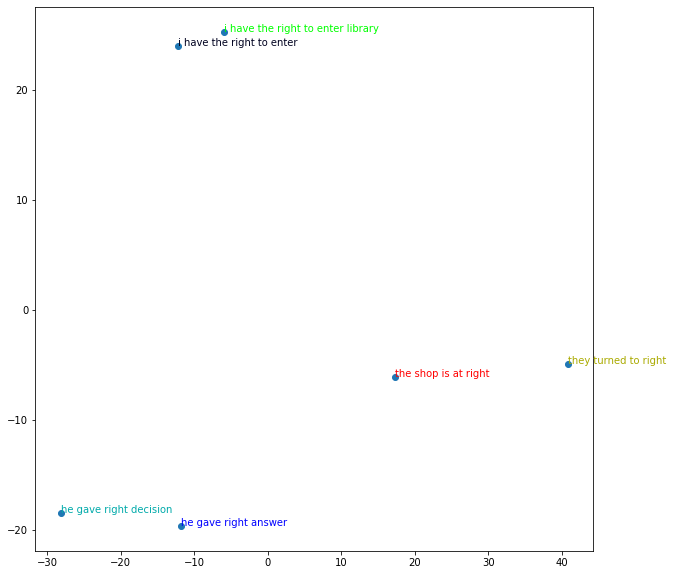

(6, 768)
- [6.1812299e+02 3.9997272e+02 2.1896317e+02 8.1359840e+01 4.5313580e+01
 1.3826988e-10]
(6,)


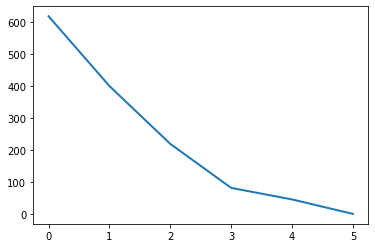

In [225]:
right_sentences_short = [ 

"the shop is at right",    
"they turned to right",
"i have the right to enter library",
"i have the right to enter",
"he gave right answer",
"he gave right decision"]
keywords = ["right"]
embeds,_,x_reduced = reduce_dim_draw( right_sentences_short,keywords ,
                                              tokenizer_nottrained,model_nottrained,fitting="pca")
print(embeds.shape)
#X_transformed = PCA(n_components=50).fit_transform(np.array(embeds))
#pca = PCA(n_components=5)
#pca = PCA().fit(np.array(embeds))

#X_transformed = pca.fit(np.array(embeds))
#print( pca.explained_variance_ )
#plt.plot(pca.explained_variance_, linewidth=2)

your_pca = PCA( svd_solver ="full")
your_pca.fit_transform(np.array(embeds))
print("-",your_pca.explained_variance_)
plt.plot(your_pca.explained_variance_, linewidth=2)
print(your_pca.explained_variance_.shape)

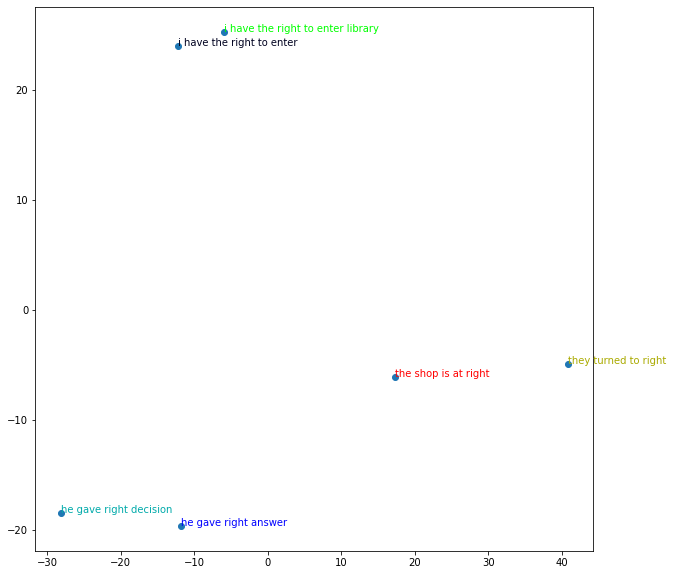

,the shop is at right,they turned to right,i have the right to enter library,i have the right to enter,he gave right answer,he gave right decision
the shop is at right,1.00,0.98,-0.54,-0.73,-0.20,-0.61
they turned to right,0.98,1.00,-0.35,-0.56,-0.41,-0.76
i have the right to enter library,-0.54,-0.35,1.00,0.97,-0.72,-0.34
i have the right to enter,-0.73,-0.56,0.97,1.00,-0.53,-0.11
he gave right answer,-0.20,-0.41,-0.72,-0.53,1.00,0.90
he gave right decision,-0.61,-0.76,-0.34,-0.11,0.90,1.00


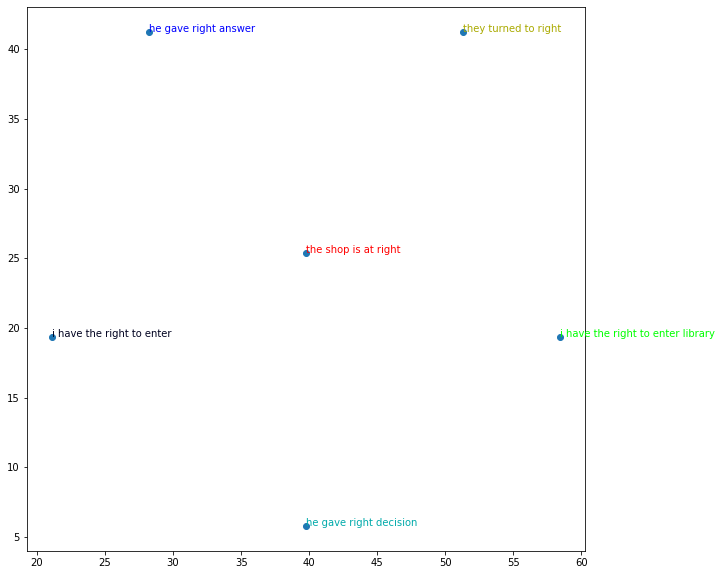

,the shop is at right,they turned to right,i have the right to enter library,i have the right to enter,he gave right answer,he gave right decision
the shop is at right,1.00,0.99,0.97,0.99,0.92,0.91
they turned to right,0.99,1.00,0.94,1.00,0.96,0.86
i have the right to enter library,0.97,0.94,1.00,0.91,0.80,0.98
i have the right to enter,0.99,1.00,0.91,1.00,0.97,0.83
he gave right answer,0.92,0.96,0.80,0.97,1.00,0.68
he gave right decision,0.91,0.86,0.98,0.83,0.68,1.00


In [233]:
right_sentences_short = [ 

"the shop is at right",    
"they turned to right",
"i have the right to enter library",
"i have the right to enter",
"he gave right answer",
"he gave right decision"]
keywords = ["right"]

dump_with_pca_tsne(right_sentences_short,keywords)

In [234]:
right_sentences_short = [ 

"the shop is at right",    
"they turned to right",
"i have the right to enter library",
"i have the right to enter",
"he gave right answer",
"he gave right decision"]
keyword = ["right"]




In [188]:
def cos_sim(a, b):
	"""Takes 2 vectors a, b and returns the cosine similarity according 
	to the definition of the dot product
	"""
	dot_product = np.dot(a, b)
	norm_a = np.linalg.norm(a)
	norm_b = np.linalg.norm(b)
	print("params :", dot_product,norm_a,norm_b,(norm_a * norm_b))
	return dot_product / (norm_a * norm_b)

v1  = word_embeddings[0]
v2  = word_embeddings[1]

sim = get_similarity(v1,v2)
print( get_similarity(v1,v2) )
print( v1[0:10])
print( v2[0:10])

print( get_similarity(v1[0:10],v2[0:10]) )
print( cosine_similarity(v1.reshape(1,-1),v2.reshape(1,-1)) )
#v1.shape
s1 = set(list(v1))
s2 = set(list(v2))
s1 == s1
print( np.sum(v1))
print( np.sum(v2))
len(v1)
cos_sim(v1,v2)

0.9764875173568726
[ 2.3753939  -2.189456   -3.3444166   0.31893107 -1.655859   -3.3589756
  2.9654894  -0.317957    0.08119281  0.15357186]
[ 3.9111512  -2.0333261  -1.2758911  -0.64052856 -0.7840498  -1.9955683
  1.5701853  -0.10420528  1.8006868   0.32025242]
0.8131682276725769
[[0.9764873]]
121.68645
101.33221
params : 36548.695 206.43077 181.31375 37428.74


0.9764875

In [164]:
a1 = np.array([1,2,3,4])
a2 = np.array([-4,8,12,16])
cosine_similarity(a1.reshape(1,-1),a2.reshape(1,-1))

array([[-0.13333333]])

In [173]:
a1 = np.random.rand(950)
a2 = np.random.rand(950)
cosine_similarity(a1.reshape(1,-1),a2.reshape(1,-1))

array([[0.74092623]])

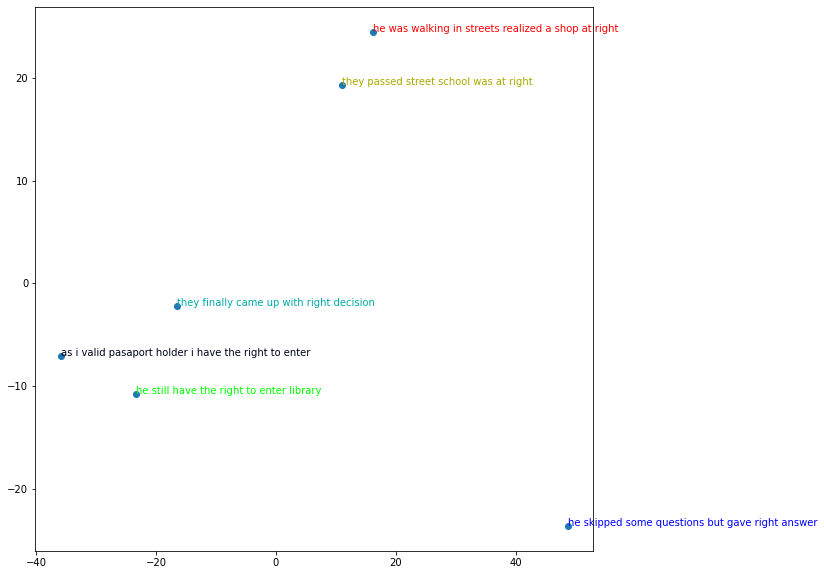

,he was walking in streets realized a shop at right,they passed street school was at right,he still have the right to enter library,as i valid pasaport holder i have the right to enter,he skipped some questions but gave right answer,they finally came up with right decision
he was walking in streets realized a shop at right,1.00,1.00,-0.85,-0.70,0.13,-0.66
they passed street school was at right,1.00,1.00,-0.81,-0.65,0.06,-0.60
he still have the right to enter library,-0.85,-0.81,1.00,0.97,-0.63,0.96
as i valid pasaport holder i have the right to enter,-0.70,-0.65,0.97,1.00,-0.80,1.00
he skipped some questions but gave right answer,0.13,0.06,-0.63,-0.80,1.00,-0.83
they finally came up with right decision,-0.66,-0.60,0.96,1.00,-0.83,1.00


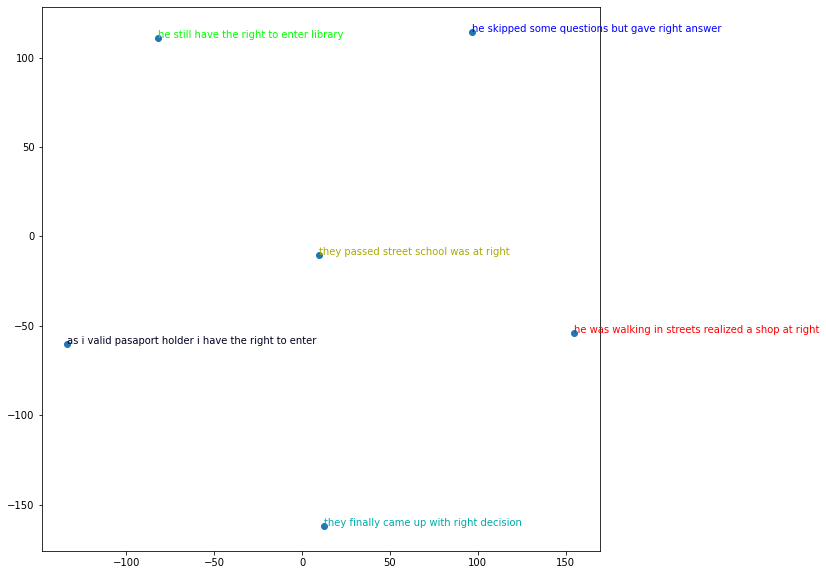

,he was walking in streets realized a shop at right,they passed street school was at right,he still have the right to enter library,as i valid pasaport holder i have the right to enter,he skipped some questions but gave right answer,they finally came up with right decision
he was walking in streets realized a shop at right,1.00,0.89,-0.83,-0.73,0.36,0.40
they passed street school was at right,0.89,1.00,-0.99,-0.33,-0.11,0.78
he still have the right to enter library,-0.83,-0.99,1.00,0.21,0.23,-0.85
as i valid pasaport holder i have the right to enter,-0.73,-0.33,0.21,1.00,-0.90,0.34
he skipped some questions but gave right answer,0.36,-0.11,0.23,-0.90,1.00,-0.71
they finally came up with right decision,0.40,0.78,-0.85,0.34,-0.71,1.00


In [235]:
right_sentences_medium = [ 

"he was walking in streets realized a shop at right",    
"they passed street school was at right",
"he still have the right to enter library",
"as i valid pasaport holder i have the right to enter",
"he skipped some questions but gave right answer",
"they finally came up with right decision"]
keywords = ["right"]

dump_with_pca_tsne(right_sentences_medium,keywords)


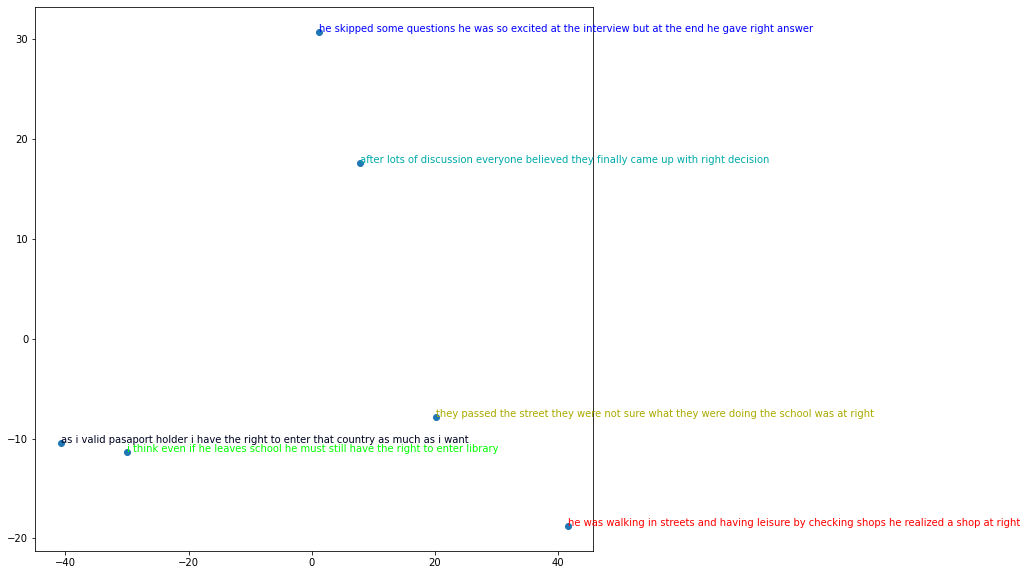

,he was walking in streets and having leisure by checking shops he realized a shop at right,they passed the street they were not sure what they were doing the school was at right,i think even if he leaves school he must still have the right to enter library,as i valid pasaport holder i have the right to enter that country as much as i want,he skipped some questions he was so excited at the interview but at the end he gave right answer,after lots of discussion everyone believed they finally came up with right decision
he was walking in streets and having leisure by checking shops he realized a shop at right,1.00,1.00,-0.71,-0.78,-0.38,-0.01
they passed the street they were not sure what they were doing the school was at right,1.00,1.00,-0.74,-0.81,-0.33,0.05
i think even if he leaves school he must still have the right to enter library,-0.71,-0.74,1.00,0.99,-0.39,-0.70
as i valid pasaport holder i have the right to enter that country as much as i want,-0.78,-0.81,0.99,1.00,-0.28,-0.62
he skipped some questions he was so excited at the interview but at the end he gave right answer,-0.38,-0.33,-0.39,-0.28,1.00,0.93
after lots of discussion everyone believed they finally came up with right decision,-0.01,0.05,-0.70,-0.62,0.93,1.00


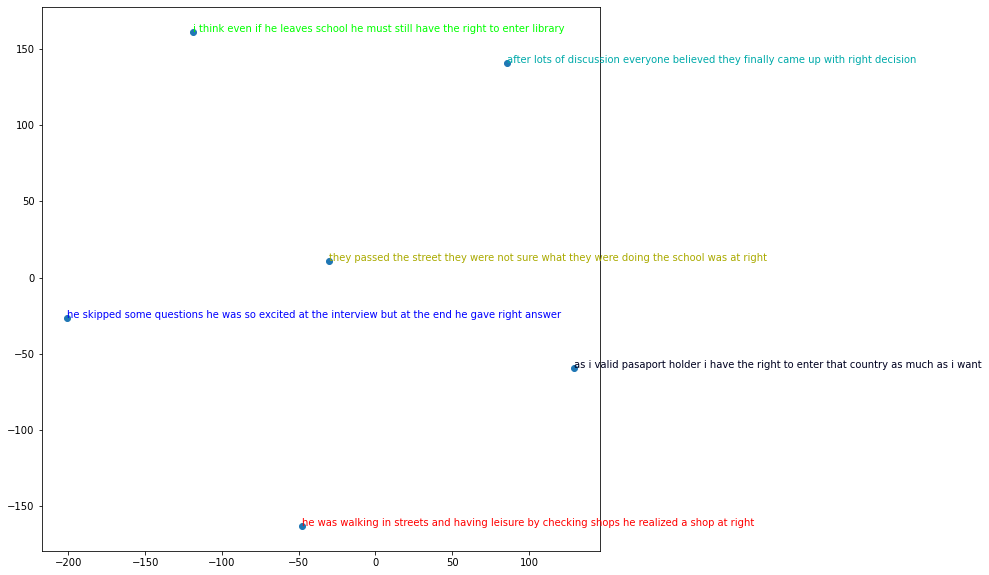

,he was walking in streets and having leisure by checking shops he realized a shop at right,they passed the street they were not sure what they were doing the school was at right,i think even if he leaves school he must still have the right to enter library,as i valid pasaport holder i have the right to enter that country as much as i want,he skipped some questions he was so excited at the interview but at the end he gave right answer,after lots of discussion everyone believed they finally came up with right decision
he was walking in streets and having leisure by checking shops he realized a shop at right,1.00,-0.05,-0.61,0.15,0.40,-0.97
they passed the street they were not sure what they were doing the school was at right,-0.05,1.00,0.83,-1.00,0.89,-0.21
i think even if he leaves school he must still have the right to enter library,-0.61,0.83,1.00,-0.87,0.48,0.38
as i valid pasaport holder i have the right to enter that country as much as i want,0.15,-1.00,-0.87,1.00,-0.85,0.12
he skipped some questions he was so excited at the interview but at the end he gave right answer,0.40,0.89,0.48,-0.85,1.00,-0.63
after lots of discussion everyone believed they finally came up with right decision,-0.97,-0.21,0.38,0.12,-0.63,1.00


In [236]:
right_sentences_long = [ 
#"i think we missed the turn we must go back and turn right this time",
"he was walking in streets and having leisure by checking shops he realized a shop at right",    
#"when he checks map he realized he will drive for 1 hour and stop at right of market",
"they passed the street they were not sure what they were doing the school was at right",
"i think even if he leaves school he must still have the right to enter library",
"as i valid pasaport holder i have the right to enter that country as much as i want",
"he skipped some questions he was so excited at the interview but at the end he gave right answer",
"after lots of discussion everyone believed they finally came up with right decision"]
keyword = ["right"]

dump_with_pca_tsne(right_sentences_long,keywords)



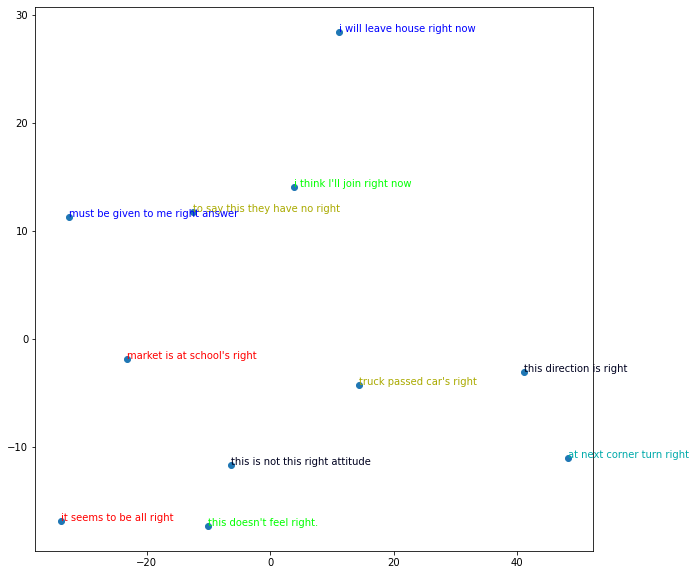

,it seems to be all right,to say this they have no right,i think I'll join right now,this direction is right,i will leave house right now,at next corner turn right,market is at school's right,truck passed car's right,this doesn't feel right.,this is not this right attitude,must be given to me right answer
it seems to be all right,1.00,0.34,-0.66,-0.86,-0.74,-0.78,0.93,-0.74,0.83,0.82,0.70
to say this they have no right,0.34,1.00,0.48,-0.77,0.38,-0.86,0.67,-0.89,-0.23,-0.26,0.91
i think I'll join right now,-0.66,0.48,1.00,0.19,0.99,0.04,-0.33,-0.02,-0.97,-0.97,0.07
this direction is right,-0.86,-0.77,0.19,1.00,0.29,0.99,-0.99,0.98,-0.44,-0.41,-0.97
i will leave house right now,-0.74,0.38,0.99,0.29,1.00,0.15,-0.43,0.09,-0.99,-0.99,-0.04
at next corner turn right,-0.78,-0.86,0.04,0.99,0.15,1.00,-0.95,1.00,-0.30,-0.27,-0.99
market is at school's right,0.93,0.67,-0.33,-0.99,-0.43,-0.95,1.00,-0.93,0.57,0.55,0.92
truck passed car's right,-0.74,-0.89,-0.02,0.98,0.09,1.00,-0.93,1.00,-0.24,-0.21,-1.00
this doesn't feel right.,0.83,-0.23,-0.97,-0.44,-0.99,-0.30,0.57,-0.24,1.00,1.00,0.19
this is not this right attitude,0.82,-0.26,-0.97,-0.41,-0.99,-0.27,0.55,-0.21,1.00,1.00,0.17


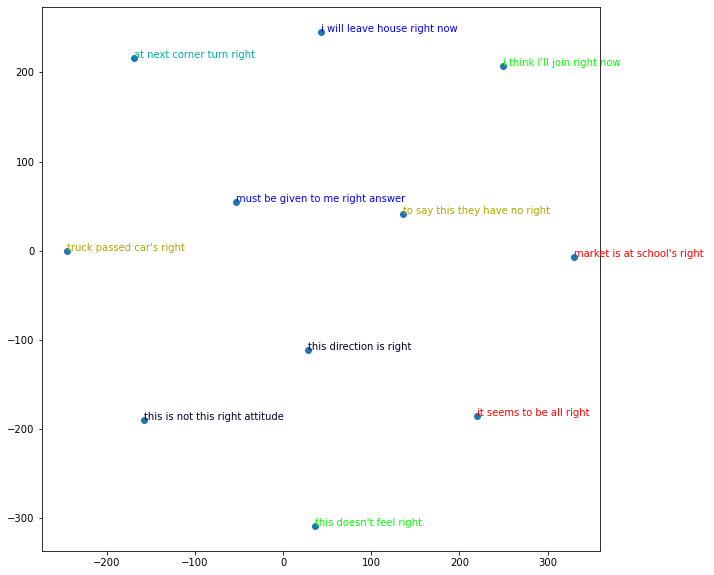

,it seems to be all right,to say this they have no right,i think I'll join right now,this direction is right,i will leave house right now,at next corner turn right,market is at school's right,truck passed car's right,this doesn't feel right.,this is not this right attitude,must be given to me right answer
it seems to be all right,1.00,0.55,0.18,0.81,-0.50,-0.98,0.78,-0.77,0.73,0.00,-1.00
to say this they have no right,0.55,1.00,0.92,-0.05,0.45,-0.36,0.95,-0.96,-0.17,-0.83,-0.46
i think I'll join right now,0.18,0.92,1.00,-0.43,0.76,0.03,0.75,-0.77,-0.54,-0.98,-0.08
this direction is right,0.81,-0.05,-0.43,1.00,-0.91,-0.91,0.26,-0.24,0.99,0.59,-0.86
i will leave house right now,-0.50,0.45,0.76,-0.91,1.00,0.67,0.15,-0.17,-0.96,-0.87,0.58
at next corner turn right,-0.98,-0.36,0.03,-0.91,0.67,1.00,-0.63,0.62,-0.85,-0.21,0.99
market is at school's right,0.78,0.95,0.75,0.26,0.15,-0.63,1.00,-1.00,0.14,-0.62,-0.72
truck passed car's right,-0.77,-0.96,-0.77,-0.24,-0.17,0.62,-1.00,1.00,-0.12,0.64,0.70
this doesn't feel right.,0.73,-0.17,-0.54,0.99,-0.96,-0.85,0.14,-0.12,1.00,0.69,-0.79
this is not this right attitude,0.00,-0.83,-0.98,0.59,-0.87,-0.21,-0.62,0.64,0.69,1.00,-0.10


In [237]:
right_sentences1 = [ 
"it seems to be all right",
"to say this they have no right",
"i think I'll join right now",
"this direction is right",
"i will leave house right now",
"at next corner turn right",
"market is at school's right ",
"truck passed car's right",                   
#"to know i had the right",
"this doesn't feel right.",
"this is not this right attitude",
"must be given to me right answer"	]
keywords = ["right"]

dump_with_pca_tsne(right_sentences1,keywords)


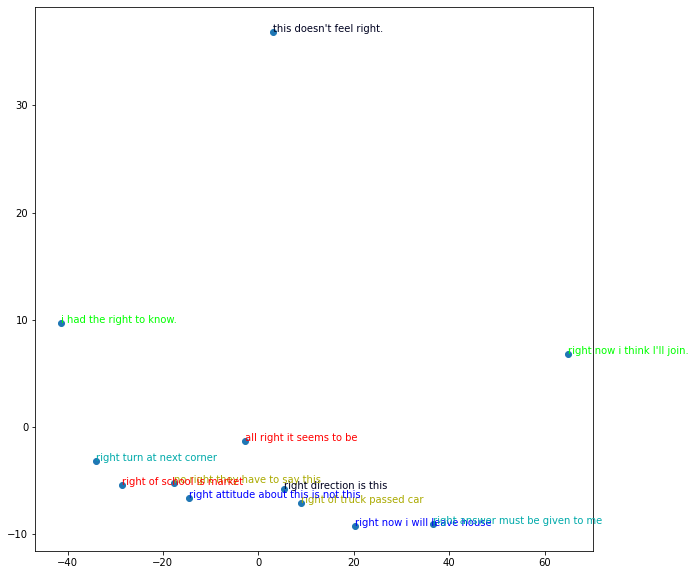

,all right it seems to be,no right they have to say this,right now i think I'll join.,right direction is this,right now i will leave house,right turn at next corner,right of school is market,right of truck passed car,i had the right to know.,this doesn't feel right.,right attitude about this is not this,right answer must be given to me
all right it seems to be,1.00,0.99,-0.94,-0.29,-0.64,0.94,0.97,-0.43,0.78,-0.51,1.00,-0.77
no right they have to say this,0.99,1.00,-0.98,-0.43,-0.75,0.98,0.99,-0.57,0.87,-0.37,0.99,-0.86
right now i think I'll join.,-0.94,-0.98,1.00,0.59,0.86,-1.00,-1.00,0.71,-0.94,0.19,-0.95,0.94
right direction is this,-0.29,-0.43,0.59,1.00,0.92,-0.60,-0.52,0.99,-0.82,-0.68,-0.30,0.83
right now i will leave house,-0.64,-0.75,0.86,0.92,1.00,-0.87,-0.81,0.97,-0.98,-0.34,-0.65,0.98
right turn at next corner,0.94,0.98,-1.00,-0.60,-0.87,1.00,1.00,-0.72,0.95,-0.18,0.94,-0.94
right of school is market,0.97,0.99,-1.00,-0.52,-0.81,1.00,1.00,-0.65,0.91,-0.27,0.97,-0.91
right of truck passed car,-0.43,-0.57,0.71,0.99,0.97,-0.72,-0.65,1.00,-0.90,-0.56,-0.45,0.91
i had the right to know.,0.78,0.87,-0.94,-0.82,-0.98,0.95,0.91,-0.90,1.00,0.14,0.79,-1.00
this doesn't feel right.,-0.51,-0.37,0.19,-0.68,-0.34,-0.18,-0.27,-0.56,0.14,1.00,-0.49,-0.16


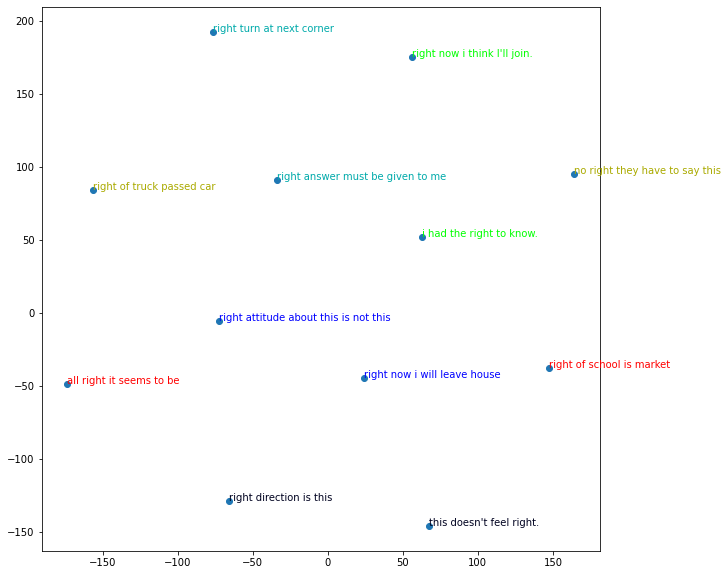

,all right it seems to be,no right they have to say this,right now i think I'll join.,right direction is this,right now i will leave house,right turn at next corner,right of school is market,right of truck passed car,i had the right to know.,this doesn't feel right.,right attitude about this is not this,right answer must be given to me
all right it seems to be,1.00,-0.97,-0.55,0.68,-0.22,0.11,-0.86,0.72,-0.91,-0.16,0.98,0.08
no right they have to say this,-0.97,1.00,0.74,-0.84,-0.03,0.14,0.71,-0.52,0.99,-0.09,-0.90,0.17
right now i think I'll join.,-0.55,0.74,1.00,-0.99,-0.69,0.77,0.06,0.18,0.84,-0.74,-0.38,0.79
right direction is this,0.68,-0.84,-0.99,1.00,0.57,-0.66,-0.22,-0.02,-0.92,0.62,0.52,-0.68
right now i will leave house,-0.22,-0.03,-0.69,0.57,1.00,-0.99,0.68,-0.84,-0.19,1.00,-0.41,-0.99
right turn at next corner,0.11,0.14,0.77,-0.66,-0.99,1.00,-0.59,0.77,0.31,-1.00,0.30,1.00
right of school is market,-0.86,0.71,0.06,-0.22,0.68,-0.59,1.00,-0.97,0.59,0.63,-0.95,-0.57
right of truck passed car,0.72,-0.52,0.18,-0.02,-0.84,0.77,-0.97,1.00,-0.38,-0.80,0.84,0.75
i had the right to know.,-0.91,0.99,0.84,-0.92,-0.19,0.31,0.59,-0.38,1.00,-0.26,-0.82,0.33
this doesn't feel right.,-0.16,-0.09,-0.74,0.62,1.00,-1.00,0.63,-0.80,-0.26,1.00,-0.35,-1.00


In [239]:
right_sentences2 = [ 
"all right it seems to be",
"no right they have to say this",
"right now i think I'll join.",
"right direction is this",
"right now i will leave house",
"right turn at next corner",
"right of school is market",
"right of truck passed car",                   
"i had the right to know.",
"this doesn't feel right.",
"right attitude about this is not this",
"right answer must be given to me"	]
keywords = ["right"]

dump_with_pca_tsne(right_sentences2,keywords)



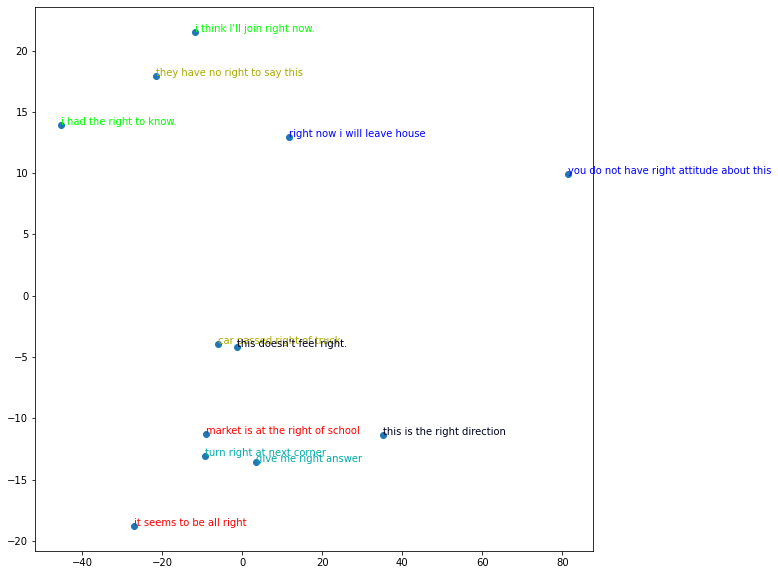

,it seems to be all right,they have no right to say this,i think I'll join right now.,this is the right direction,right now i will leave house,turn right at next corner,market is at the right of school,car passed right of truck,i had the right to know.,this doesn't feel right.,you do not have right attitude about this,give me right answer
it seems to be all right,1.00,0.27,-0.10,-0.61,-0.97,0.94,0.96,1.00,0.62,0.78,-0.88,0.35
they have no right to say this,0.27,1.00,0.93,-0.93,-0.04,-0.07,-0.01,0.31,0.92,-0.39,-0.69,-0.81
i think I'll join right now.,-0.10,0.93,1.00,-0.73,0.32,-0.43,-0.38,-0.06,0.72,-0.70,-0.37,-0.97
this is the right direction,-0.61,-0.93,-0.73,1.00,0.41,-0.30,-0.36,-0.64,-1.00,0.02,0.91,0.54
right now i will leave house,-0.97,-0.04,0.32,0.41,1.00,-0.99,-1.00,-0.96,-0.42,-0.90,0.76,-0.55
turn right at next corner,0.94,-0.07,-0.43,-0.30,-0.99,1.00,1.00,0.93,0.32,0.95,-0.67,0.64
market is at the right of school,0.96,-0.01,-0.38,-0.36,-1.00,1.00,1.00,0.95,0.37,0.92,-0.72,0.60
car passed right of truck,1.00,0.31,-0.06,-0.64,-0.96,0.93,0.95,1.00,0.65,0.75,-0.90,0.31
i had the right to know.,0.62,0.92,0.72,-1.00,-0.42,0.32,0.37,0.65,1.00,-0.01,-0.91,-0.52
this doesn't feel right.,0.78,-0.39,-0.70,0.02,-0.90,0.95,0.92,0.75,-0.01,1.00,-0.40,0.86


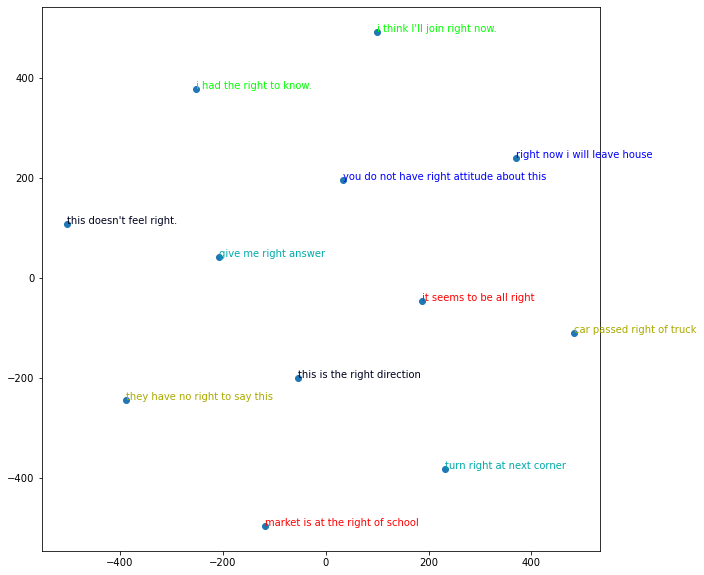

,it seems to be all right,they have no right to say this,i think I'll join right now.,this is the right direction,right now i will leave house,turn right at next corner,market is at the right of school,car passed right of truck,i had the right to know.,this doesn't feel right.,you do not have right attitude about this,give me right answer
it seems to be all right,1.00,-0.70,-0.04,-0.02,0.69,0.71,0.00,1.00,-0.74,-1.00,-0.07,-1.00
they have no right to say this,-0.70,1.00,-0.69,0.73,-1.00,0.01,0.71,-0.71,0.03,0.72,-0.67,0.73
i think I'll join right now.,-0.04,-0.69,1.00,-1.00,0.70,-0.73,-1.00,-0.03,0.71,0.01,1.00,-0.00
this is the right direction,-0.02,0.73,-1.00,1.00,-0.74,0.69,1.00,-0.04,-0.66,0.05,-1.00,0.06
right now i will leave house,0.69,-1.00,0.70,-0.74,1.00,-0.03,-0.73,0.70,-0.01,-0.71,0.68,-0.71
turn right at next corner,0.71,0.01,-0.73,0.69,-0.03,1.00,0.71,0.70,-1.00,-0.69,-0.75,-0.68
market is at the right of school,0.00,0.71,-1.00,1.00,-0.73,0.71,1.00,-0.01,-0.68,0.03,-1.00,0.04
car passed right of truck,1.00,-0.71,-0.03,-0.04,0.70,0.70,-0.01,1.00,-0.73,-1.00,-0.05,-1.00
i had the right to know.,-0.74,0.03,0.71,-0.66,-0.01,-1.00,-0.68,-0.73,1.00,0.72,0.72,0.71
this doesn't feel right.,-1.00,0.72,0.01,0.05,-0.71,-0.69,0.03,-1.00,0.72,1.00,0.04,1.00


In [240]:
right_sentences3 = [ "it seems to be all right",
"they have no right to say this",
"i think I'll join right now.",
"this is the right direction",
"right now i will leave house",
"turn right at next corner",
"market is at the right of school",
"car passed right of truck",                   
"i had the right to know.",
"this doesn't feel right.",
"you do not have right attitude about this",
"give me right answer"	]
keywords = ["right"]

dump_with_pca_tsne(right_sentences3,keywords)


right_sentences 35


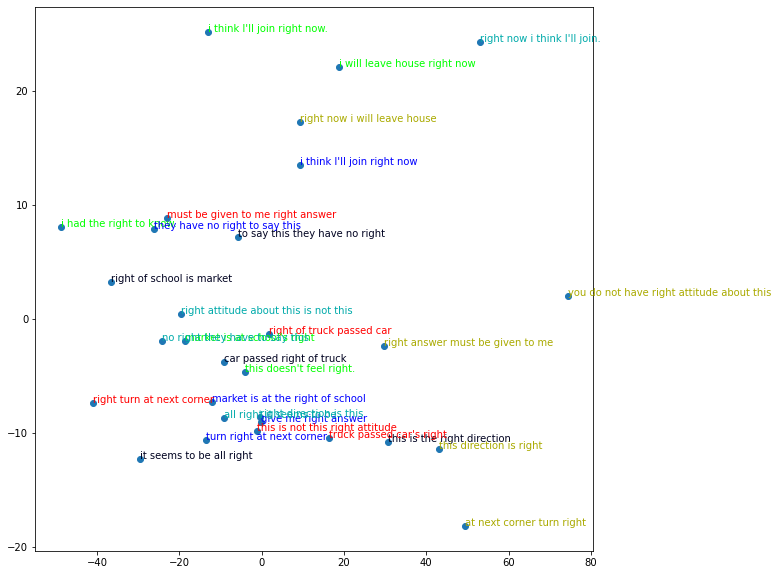

,right of truck passed car,at next corner turn right,i had the right to know.,to say this they have no right,give me right answer,right attitude about this is not this,must be given to me right answer,right now i will leave house,i think I'll join right now.,this is the right direction,i think I'll join right now,right direction is this,truck passed car's right,this direction is right,i will leave house right now,car passed right of truck,market is at the right of school,all right it seems to be,right turn at next corner,right answer must be given to me,market is at school's right,it seems to be all right,they have no right to say this,right now i think I'll join.,this is not this right attitude,you do not have right attitude about this,this doesn't feel right.,right of school is market,turn right at next corner,no right they have to say this
right of truck passed car,1.00,0.96,-0.89,-0.97,0.59,-0.81,-0.96,-0.15,-0.90,0.95,-0.04,0.57,1.00,0.93,0.06,-0.51,-0.38,-0.17,-0.68,0.84,-0.73,-0.51,-0.94,0.48,0.50,0.78,-0.06,-0.85,-0.26,-0.75
at next corner turn right,0.96,1.00,-0.98,-0.86,0.33,-0.95,-1.00,0.14,-0.74,1.00,0.25,0.31,0.98,1.00,0.35,-0.74,-0.63,-0.45,-0.86,0.96,-0.90,-0.73,-1.00,0.71,0.23,0.93,-0.35,-0.97,-0.53,-0.91
i had the right to know.,-0.89,-0.98,1.00,0.74,-0.15,0.99,0.98,-0.32,0.60,-0.98,-0.43,-0.12,-0.92,-1.00,-0.51,0.85,0.76,0.61,0.94,-1.00,0.96,0.85,0.99,-0.83,-0.04,-0.98,0.51,1.00,0.68,0.97
to say this they have no right,-0.97,-0.86,0.74,1.00,-0.77,0.64,0.86,0.39,0.98,-0.85,0.28,-0.75,-0.95,-0.80,0.19,0.29,0.14,-0.08,0.48,-0.69,0.54,0.28,0.82,-0.24,-0.70,-0.60,-0.19,0.69,0.01,0.56
give me right answer,0.59,0.33,-0.15,-0.77,1.00,-0.01,-0.35,-0.89,-0.88,0.32,-0.83,1.00,0.53,0.24,-0.77,0.39,0.53,0.70,0.19,0.07,0.12,0.40,-0.28,-0.43,0.99,-0.04,0.77,-0.07,0.63,0.09
right attitude about this is not this,-0.81,-0.95,0.99,0.64,-0.01,1.00,0.94,-0.46,0.48,-0.95,-0.55,0.02,-0.85,-0.97,-0.63,0.92,0.85,0.71,0.98,-1.00,0.99,0.92,0.96,-0.90,0.10,-1.00,0.63,1.00,0.77,1.00
must be given to me right answer,-0.96,-1.00,0.98,0.86,-0.35,0.94,1.00,-0.12,0.75,-1.00,-0.24,-0.32,-0.98,-0.99,-0.33,0.73,0.61,0.43,0.85,-0.96,0.89,0.72,1.00,-0.70,-0.24,-0.92,0.33,0.96,0.51,0.90
right now i will leave house,-0.15,0.14,-0.32,0.39,-0.89,-0.46,-0.12,1.00,0.56,0.16,0.99,-0.90,-0.07,0.23,0.98,-0.77,-0.86,-0.95,-0.62,0.40,-0.56,-0.78,-0.20,0.80,-0.93,0.50,-0.98,-0.39,-0.92,-0.54
i think I'll join right now.,-0.90,-0.74,0.60,0.98,-0.88,0.48,0.75,0.56,1.00,-0.73,0.46,-0.87,-0.87,-0.67,0.38,0.10,-0.06,-0.27,0.30,-0.53,0.37,0.09,0.70,-0.05,-0.82,-0.44,-0.38,0.54,-0.18,0.39
this is the right direction,0.95,1.00,-0.98,-0.85,0.32,-0.95,-1.00,0.16,-0.73,1.00,0.27,0.29,0.97,1.00,0.36,-0.75,-0.64,-0.46,-0.87,0.97,-0.90,-0.74,-1.00,0.72,0.21,0.93,-0.36,-0.97,-0.54,-0.91


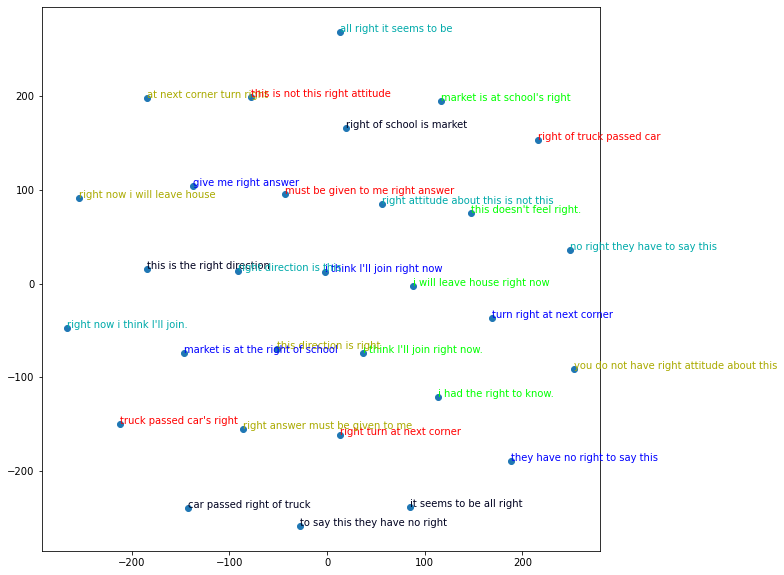

,right of truck passed car,at next corner turn right,i had the right to know.,to say this they have no right,give me right answer,right attitude about this is not this,must be given to me right answer,right now i will leave house,i think I'll join right now.,this is the right direction,i think I'll join right now,right direction is this,truck passed car's right,this direction is right,i will leave house right now,car passed right of truck,market is at the right of school,all right it seems to be,right turn at next corner,right answer must be given to me,market is at school's right,it seems to be all right,they have no right to say this,right now i think I'll join.,this is not this right attitude,you do not have right attitude about this,this doesn't feel right.,right of school is market,turn right at next corner,no right they have to say this
right of truck passed car,1.00,-0.14,0.14,-0.66,-0.30,0.93,0.19,-0.58,-0.15,-0.77,0.41,-0.73,-1.00,-0.95,0.80,-0.91,-0.99,0.62,-0.51,-0.90,0.91,-0.27,0.17,-0.91,0.24,0.58,0.99,0.67,0.68,0.89
at next corner turn right,-0.14,1.00,-1.00,-0.65,0.99,0.23,0.95,0.89,-0.96,0.74,0.85,0.78,0.14,-0.19,-0.70,-0.28,0.28,0.70,-0.78,-0.31,0.28,-0.92,-1.00,0.54,0.93,-0.89,-0.28,0.65,-0.82,-0.57
i had the right to know.,0.14,-1.00,1.00,0.65,-0.99,-0.23,-0.95,-0.89,0.96,-0.74,-0.85,-0.78,-0.14,0.19,0.70,0.28,-0.28,-0.69,0.78,0.31,-0.27,0.92,1.00,-0.55,-0.93,0.89,0.28,-0.64,0.82,0.57
to say this they have no right,-0.66,-0.65,0.65,1.00,-0.52,-0.89,-0.86,-0.24,0.84,0.02,-0.96,-0.04,0.66,0.87,-0.08,0.91,0.54,-1.00,0.98,0.92,-0.91,0.90,0.63,0.28,-0.89,0.24,-0.55,-1.00,0.11,-0.25
give me right answer,-0.30,0.99,-0.99,-0.52,1.00,0.07,0.88,0.95,-0.90,0.84,0.75,0.87,0.30,-0.02,-0.81,-0.11,0.44,0.56,-0.67,-0.14,0.11,-0.84,-0.99,0.68,0.85,-0.95,-0.43,0.51,-0.91,-0.70
right attitude about this is not this,0.93,0.23,-0.23,-0.89,0.07,1.00,0.53,-0.24,-0.50,-0.48,0.71,-0.43,-0.93,-1.00,0.53,-1.00,-0.87,0.86,-0.79,-1.00,1.00,-0.60,-0.20,-0.69,0.58,0.24,0.87,0.89,0.36,0.66
must be given to me right answer,0.19,0.95,-0.95,-0.86,0.88,0.53,1.00,0.70,-1.00,0.49,0.97,0.54,-0.19,-0.49,-0.44,-0.57,-0.04,0.89,-0.94,-0.59,0.57,-1.00,-0.94,0.25,1.00,-0.70,0.04,0.86,-0.60,-0.28
right now i will leave house,-0.58,0.89,-0.89,-0.24,0.95,-0.24,0.70,1.00,-0.72,0.97,0.51,0.98,0.58,0.28,-0.95,0.19,0.69,0.29,-0.41,0.16,-0.19,-0.63,-0.90,0.87,0.66,-1.00,-0.69,0.23,-0.99,-0.88
i think I'll join right now.,-0.15,-0.96,0.96,0.84,-0.90,-0.50,-1.00,-0.72,1.00,-0.52,-0.96,-0.57,0.15,0.46,0.47,0.54,0.01,-0.87,0.93,0.57,-0.54,0.99,0.95,-0.28,-1.00,0.72,-0.01,-0.84,0.63,0.31
this is the right direction,-0.77,0.74,-0.74,0.02,0.84,-0.48,0.49,0.97,-0.52,1.00,0.27,1.00,0.77,0.52,-1.00,0.44,0.85,0.03,-0.16,0.41,-0.44,-0.41,-0.76,0.97,0.44,-0.97,-0.85,-0.03,-0.99,-0.97


In [245]:
right_sentences = right_sentences1 + right_sentences2 + right_sentences3
print("right_sentences",len(right_sentences))
keywords = ["right"]

#dump_with_pca_tsne(right_sentences,keywords)
right_sentences_set = set(right_sentences)
dump_with_pca_tsne(list( right_sentences_set ),keywords)

#eat_sentences = [ s for s in right_sentences if s.find(keyword) > 0 ]
#word_embeddings = [ get_word_embeddings(tokenizer_nottrained,model_nottrained,s,keyword)[0].vector.detach().numpy() for s in eat_sentences ]
#dump_on_surface(word_embeddings,eat_sentences,dump_3d=False,fitting="tsne",color_by="other")

In [21]:
sentences_wread = [ s for s in sentences if "book"  in s]


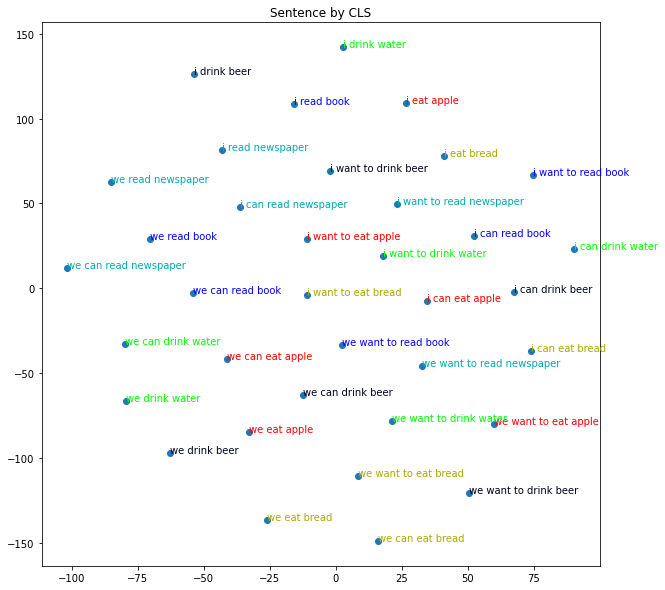

In [22]:
outputs = [ get_sentence_output(tokenizer_nottrained,model_nottrained,s).detach().numpy() for s in sentences]
dump_on_surface(outputs,sentences,fitting="tsne",dump_3d=False,dump_2d=True,color_by="object",title="Sentence by CLS")

In [362]:
sentences = [ "the shop is at right",   
"they turned to right",
"he was walking in streets realized a shop at right",   
"they passed street school was at right",
"he was walking in streets and having leisure by checking shops he realized a shop at right",   
"when he checks map he realized he will drive for 1 hour and stop at right of market",
"they passed the street they were not sure what they were doing the school was at right",
"the lion suddenly began to run to right for catching deers",
"turn left walk straight then turn right you will see school",
"he was using his right arm for daily works left arm for tennis",
"i have the right to enter library",
"he still have the right to enter library",
"as i valid pasaport holder i have the right to enter",
"i think even if he leaves school he must still have the right to enter library",
"as i valid pasaport holder i have the right to enter that country as much as i want",
"even they are divorced he has the right to see his children",
"human right is the difference between developed and undeveloped countries",
"You're right to be annoyed for bad behaviour",
"She campaigned for women's right in her country",
"Everyone has a right to get education",
"for difficult questiong he gave right answer",
"for complicated problems he gave right decision",
"he skipped some questions but gave right answer",
"they finally came up with right decision",
"he skipped some questions he was so excited at the interview but at the end he gave right answer",
"after lots of discussion everyone believed they finally came up with right decision",
"this is not the right attitude for talking with children when they make a mistake",
"every problem is unique so right approach depends on complexity of problem",
"altough he deserved to be fired this was the right way to do so",
"he is not the right person to ask this question"]

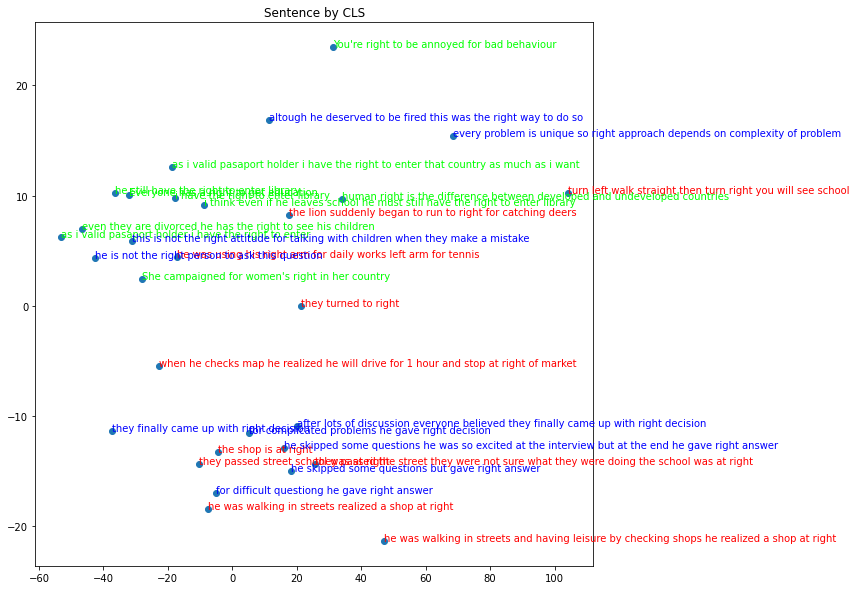

array([[-4.55296898e+00, -1.32786245e+01],
       [ 2.14387112e+01, -1.10983178e-02],
       [-7.58871222e+00, -1.84400997e+01],
       [-1.02314882e+01, -1.43541975e+01],
       [ 4.71454468e+01, -2.13363285e+01],
       [-2.26796246e+01, -5.45295906e+00],
       [ 2.55821552e+01, -1.43361750e+01],
       [ 1.76646805e+01,  8.27586079e+00],
       [ 1.04111046e+02,  1.02341900e+01],
       [-1.71538525e+01,  4.43745327e+00],
       [-1.79388371e+01,  9.78084946e+00],
       [-3.64280586e+01,  1.02735147e+01],
       [-5.32694969e+01,  6.20372009e+00],
       [-8.86128998e+00,  9.15030670e+00],
       [-1.86921673e+01,  1.25666599e+01],
       [-4.66924133e+01,  6.94041586e+00],
       [ 3.40851822e+01,  9.65912247e+00],
       [ 3.11758690e+01,  2.34885864e+01],
       [-2.81526947e+01,  2.40667605e+00],
       [-3.22196770e+01,  1.00457325e+01],
       [-4.98405409e+00, -1.69635944e+01],
       [ 5.30378056e+00, -1.15650225e+01],
       [ 1.82761517e+01, -1.49670515e+01],
       [-3.

In [377]:
outputs = [ get_word_embeddings(tokenizer_nottrained,model_nottrained,s,"right")[0].vector.detach().numpy() for s in sentences]
dump_on_surface(outputs,sentences,fitting="pca",dump_3d=False,dump_2d=True,color_by="index10",title="Sentence by CLS")


In [363]:
#utility methods for creating dataframe

        


def get_df():
    df = pd.DataFrame()
    df["Sentence"] = sentences
    df["Group"] = [ (index // 10) for index,s in enumerate(sentences) ]
    return df

In [364]:
input_df = None
CLASS_NUMS = None
MAX_LEN = 8

#Uncomment related block to see different architectures and results.
input_df = get_df_by_verb()
CLASS_NUMS = 3

#If you want to run the code for object uncomment 2 below lines
#input_df = get_df_by_object()
#CLASS_NUMS = 6

#input_df = get_df_by_subject()
#CLASS_NUMS = 2

input_df.head(40)

,Sentence,Group
0,the shop is at right,0
1,they turned to right,0
2,he was walking in streets realized a shop at r...,0
3,they passed street school was at right,0
4,he was walking in streets and having leisure b...,0
5,when he checks map he realized he will drive f...,0
6,they passed the street they were not sure what...,0
7,the lion suddenly began to run to right for ca...,0
8,turn left walk straight then turn right you wi...,0
9,he was using his right arm for daily works lef...,0


In [365]:
xlnet_tokenizer  = XLNetTokenizer.from_pretrained('xlnet-base-cased') 
xlnet_model = XLNetModel.from_pretrained('xlnet-base-cased')


In [366]:
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler

class SentimentData(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe["Sentence"]
        self.targets = dataframe["Group"]
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        target = self.targets[index]

        return text,target

In [367]:
training_set = SentimentData(input_df, tokenizer, MAX_LEN)
#My dataset is small, I am doing only for visualizing so I dont use test set
train_params = {'batch_size': 4,'shuffle': True}
training_loader = DataLoader(training_set, **train_params)

In [368]:
class XLNETClassifier(torch.nn.Module):
    def __init__(self,nn_tokenizer,nn_bert_model):
        super(XLNETClassifier, self).__init__()
        nn_bert_model.train()
        self.nn_bert_model = nn_bert_model 
        self.nn_tokenizer = nn_tokenizer
        self.classifier = torch.nn.Linear(768, CLASS_NUMS)

    def forward(self, sentence_list):
        #bert_embeddings = []
        #for s in sentence_list:
        #    vright = get_word_embeddings(self.nn_tokenizer,self.nn_bert_model,s,"right")
        #    print(s,"vright,",vright)
        #    bert_embeddings.append( vright[0].vector )
        #bert_embeddings = [get_sentence_output(self.nn_tokenizer,self.nn_bert_model,s) for s in sentence_list ]
        bert_embeddings = [get_word_embeddings(self.nn_tokenizer,self.nn_bert_model,s,"right")[0].vector for s in sentence_list ]
        #(tokenizer_,model_,sent,keyword)[0].vector.detach().numpy
        
        bert_vector = torch.stack(bert_embeddings)
                
        relu_output = torch.nn.ReLU()(bert_vector)                
        output = self.classifier(relu_output)
        return output

In [369]:
#train Classfier network
def train(epoch):

    correct_predictions = 0
    classfier.train()
    for _,data in tqdm(enumerate(training_loader, 0)):
        #get data and labels
        sentence_batch = data[0]
        targets = data[1].to(device, dtype = torch.long)
        #call network forward and calculate loss
        outputs = classfier(sentence_batch)
        #print("outputs, targets",outputs, targets)
        loss = loss_function(outputs, targets)
        #get predictions and compare with actual        
        _, predicted_groups = torch.max(outputs.data, dim=1)        
        correct_predictions += (predicted_groups  == targets).sum().item()
            
        #do back propagation    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    epoch_accu = int( ( correct_predictions * 100 )/len(sentences) )        

    return epoch_accu

In [370]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [371]:
classfier = XLNETClassifier(xlnet_tokenizer,xlnet_model)
xlnet_model.train()
_ = classfier.to(device)

In [372]:
pytorch_total_params = sum(p.numel() for p in classfier.parameters() if p.requires_grad)    
pytorch_trainable_params = sum(p.numel() for p in classfier.parameters() )    
print("Total number of params", pytorch_total_params)
print("Total number of trainable params", pytorch_trainable_params)

Total number of params 116720643
Total number of trainable params 116720643


In [373]:
from tqdm import tqdm

# Creating the loss function and optimizer
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  classfier.parameters(), lr=1e-05)

EPOCHS = 14
for epoch in range(EPOCHS):
    epoch_accu = train(epoch)
    print(f"At Epoch {epoch+1}  Accuracy : {epoch_accu}")
    if epoch_accu > 93:
        break



8it [00:46,  5.79s/it]
0it [00:00, ?it/s]

At Epoch 1  Accuracy : 40


8it [00:40,  5.04s/it]
0it [00:00, ?it/s]

At Epoch 2  Accuracy : 50


8it [00:41,  5.24s/it]
0it [00:00, ?it/s]

At Epoch 3  Accuracy : 53


8it [00:32,  4.03s/it]
0it [00:00, ?it/s]

At Epoch 4  Accuracy : 83


8it [00:34,  4.37s/it]
0it [00:00, ?it/s]

At Epoch 5  Accuracy : 76


8it [00:31,  3.92s/it]
0it [00:00, ?it/s]

At Epoch 6  Accuracy : 70


8it [00:26,  3.34s/it]
0it [00:00, ?it/s]

At Epoch 7  Accuracy : 90


8it [00:27,  3.50s/it]

At Epoch 8  Accuracy : 96


In [374]:
#put Bert trained model into eval mode
_ = xlnet_model.eval()

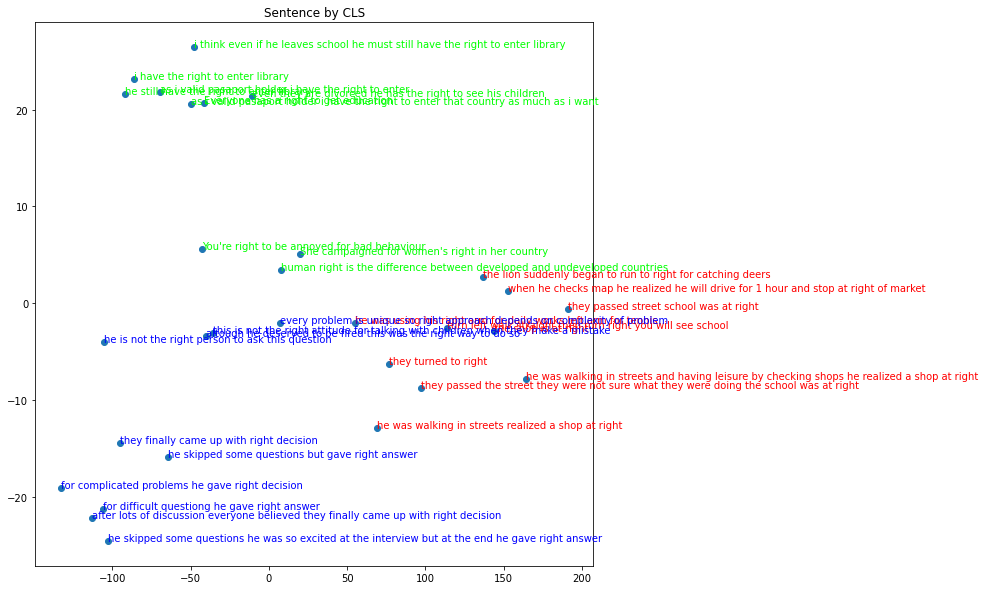

array([[ 143.62102  ,   -2.9016442],
       [  76.914024 ,   -6.2190776],
       [  68.76567  ,  -12.883618 ],
       [ 191.0599   ,   -0.6070354],
       [ 164.52586  ,   -7.8143463],
       [ 152.9047   ,    1.2530904],
       [  96.93474  ,   -8.716578 ],
       [ 136.93489  ,    2.6847308],
       [ 113.4914   ,   -2.545701 ],
       [  54.87306  ,   -2.031259 ],
       [ -86.20027  ,   23.168848 ],
       [ -92.08085  ,   21.645376 ],
       [ -69.66155  ,   21.76138  ],
       [ -47.73366  ,   26.46536  ],
       [ -50.01254  ,   20.550236 ],
       [ -10.643207 ,   21.442078 ],
       [   7.985997 ,    3.4010916],
       [ -42.512325 ,    5.569684 ],
       [  20.032665 ,    5.039837 ],
       [ -41.369144 ,   20.648949 ],
       [-105.856995 ,  -21.257902 ],
       [-132.98401  ,  -19.0829   ],
       [ -64.192665 ,  -15.872912 ],
       [ -94.91842  ,  -14.41099  ],
       [-102.75493  ,  -24.545801 ],
       [-112.74251  ,  -22.199776 ],
       [ -35.785713 ,   -3.1012242],
 

In [376]:
outputs = [ get_word_embeddings(xlnet_tokenizer,xlnet_model,s,"right")[0].vector.detach().numpy() for s in sentences]
dump_on_surface(outputs,sentences,fitting="pca",dump_3d=False,dump_2d=True,color_by="index10",title="Sentence by CLS")


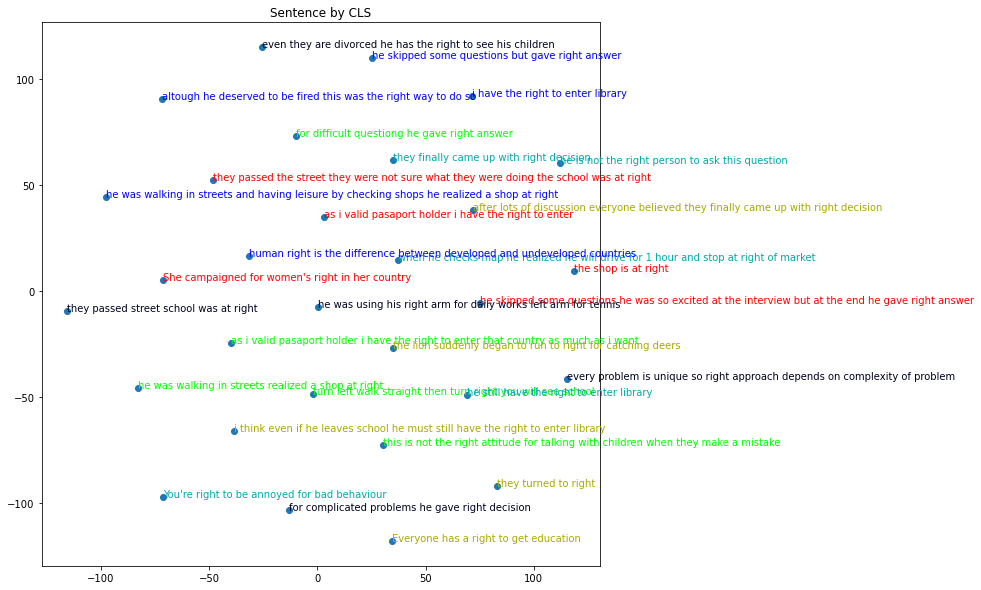

array([[ 118.69548   ,    9.3809805 ],
       [  82.87059   ,  -92.035484  ],
       [ -82.74496   ,  -45.85481   ],
       [-115.60124   ,   -9.70234   ],
       [ -97.65186   ,   44.023468  ],
       [  37.386864  ,   14.492072  ],
       [ -48.178616  ,   52.055546  ],
       [  34.93437   ,  -26.912971  ],
       [  -1.9277004 ,  -48.698574  ],
       [   0.32669112,   -7.648824  ],
       [  71.5191    ,   91.54005   ],
       [  69.2213    ,  -49.06673   ],
       [   3.1671648 ,   34.565575  ],
       [ -38.49481   ,  -66.29537   ],
       [ -39.70546   ,  -24.548496  ],
       [ -25.66838   ,  114.908676  ],
       [ -31.573437  ,   16.172789  ],
       [ -71.34045   ,  -97.13798   ],
       [ -71.49069   ,    5.0026755 ],
       [  34.39621   , -118.11005   ],
       [  -9.645455  ,   72.92283   ],
       [ -12.917889  , -103.607185  ],
       [  25.293348  ,  109.61936   ],
       [  35.048454  ,   61.740234  ],
       [  75.30696   ,   -5.9782033 ],
       [  71.88344   ,   

In [338]:
#1)Get CLS as sentence embedding
outputs = [ get_sentence_output(xlnet_tokenizer,xlnet_model,s).detach().numpy() for s in sentences]
dump_on_surface(outputs,sentences,fitting="tsne",dump_3d=False,dump_2d=True,color_by="other",title="Sentence by CLS")


In [293]:
keyword = "right"
eat_sentences = [ s for s in sentences if s.find(keyword) > 0 ]
word_embeddings = [ get_word_embeddings(xlnet_tokenizer,xlnet_model,s,keyword)[0].vector.detach().numpy() for s in eat_sentences ]
dump_on_surface(word_embeddings,eat_sentences,dump_3d=False,fitting="tsne",color_by="other")

IndexError: list index out of range

In [37]:
#Now I want to see relation of these "eat" vectors,
#these are all eat vectors but having different context
#I will take cosine of every vector with every other,
#so diagonals must be 1(same vectors) and others must show
#the relation. As I see items most unrelated are as below
#we eat apple -> i can eat bread = 0.71 similarity

comparisions = []
for i in range(len(word_embeddings)):
    comparision_row = []
    for j in range(len(word_embeddings)):
        sim = get_similarity(word_embeddings[i],word_embeddings[j])
        comparision_row.append(sim)
    comparisions.append( comparision_row )   
    
pd.options.display.float_format = '{:,.2f}'.format
cm = sns.light_palette("blue", as_cmap=True)

df = pd.DataFrame(data=comparisions ,index=eat_sentences,columns=eat_sentences)
styled_df = df.style.background_gradient(cmap=cm).set_precision(2)
styled_df

,i want to drink water,i want to drink beer,i can drink water,i can drink beer,we want to drink water,we want to drink beer,we can drink water,we can drink beer,i drink water,i drink beer,we drink water,we drink beer
i want to drink water,1.00,0.97,0.97,0.95,0.92,0.93,0.94,0.93,0.96,0.94,0.93,0.93
i want to drink beer,0.97,1.00,0.96,0.98,0.89,0.96,0.93,0.95,0.94,0.96,0.91,0.95
i can drink water,0.97,0.96,1.00,0.97,0.91,0.92,0.96,0.95,0.96,0.94,0.93,0.93
i can drink beer,0.95,0.98,0.97,1.00,0.87,0.94,0.94,0.97,0.94,0.96,0.91,0.94
we want to drink water,0.92,0.89,0.91,0.87,1.00,0.92,0.90,0.87,0.91,0.88,0.91,0.87
we want to drink beer,0.93,0.96,0.92,0.94,0.92,1.00,0.92,0.95,0.91,0.94,0.91,0.94
we can drink water,0.94,0.93,0.96,0.94,0.90,0.92,1.00,0.98,0.94,0.92,0.97,0.96
we can drink beer,0.93,0.95,0.95,0.97,0.87,0.95,0.98,1.00,0.92,0.93,0.94,0.97
i drink water,0.96,0.94,0.96,0.94,0.91,0.91,0.94,0.92,1.00,0.97,0.93,0.93
i drink beer,0.94,0.96,0.94,0.96,0.88,0.94,0.92,0.93,0.97,1.00,0.91,0.94


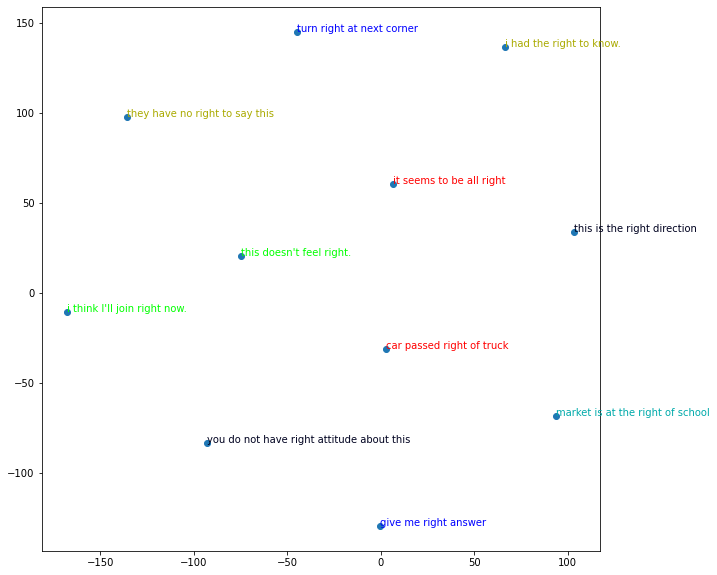

In [50]:
keyword = "right"
eat_sentences = [ s for s in right_sentences if s.find(keyword) > 0 ]
word_embeddings = [ get_word_embeddings(xlnet_tokenizer,xlnet_model,s,keyword)[0].vector.detach().numpy() for s in eat_sentences ]
dump_on_surface(word_embeddings,eat_sentences,dump_3d=False,fitting="tsne",color_by="other")